In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# Pull CPI USA data YoY

yoy = pd.read_csv('/content/yoy.csv')

yoy.head()

,date,cpi_us,cpi_yoy_roc,gpd_us,gpd_yoy_cpi
0,J-60,1.457976,NaN,3259.971,NaN
1,J-61,1.070724,-26.560920,3343.546,2.563673
2,J-62,1.198773,11.959121,3548.409,6.127118
3,J-63,1.239669,3.411493,3702.944,4.355050
4,J-64,1.278912,3.165533,3916.280,5.761254


In [ ]:
yoy.isnull().sum()

date           0
cpi_us         0
cpi_yoy_roc    1
gpd_us         0
gpd_yoy_cpi    1
dtype: int64

In [ ]:
# GDP YoY data back to 1929 instead of 1960 as previously 

gdp = pd.read_csv('/content/GDP.csv')

gdp.head()

,date,gdpca
0,29-Jan,1109.448
1,30-Jan,1015.058
2,31-Jan,950.037
3,Jan-32,827.495
4,Jan-33,817.265


In [ ]:
# GDP_qoq['date'] = pd.to_datetime(GDP_qoq['date'], infer_datetime_format=True)
# GDP_qoq.head()

In [ ]:
qoq = pd.read_csv('/content/qoq.csv')

qoq.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178


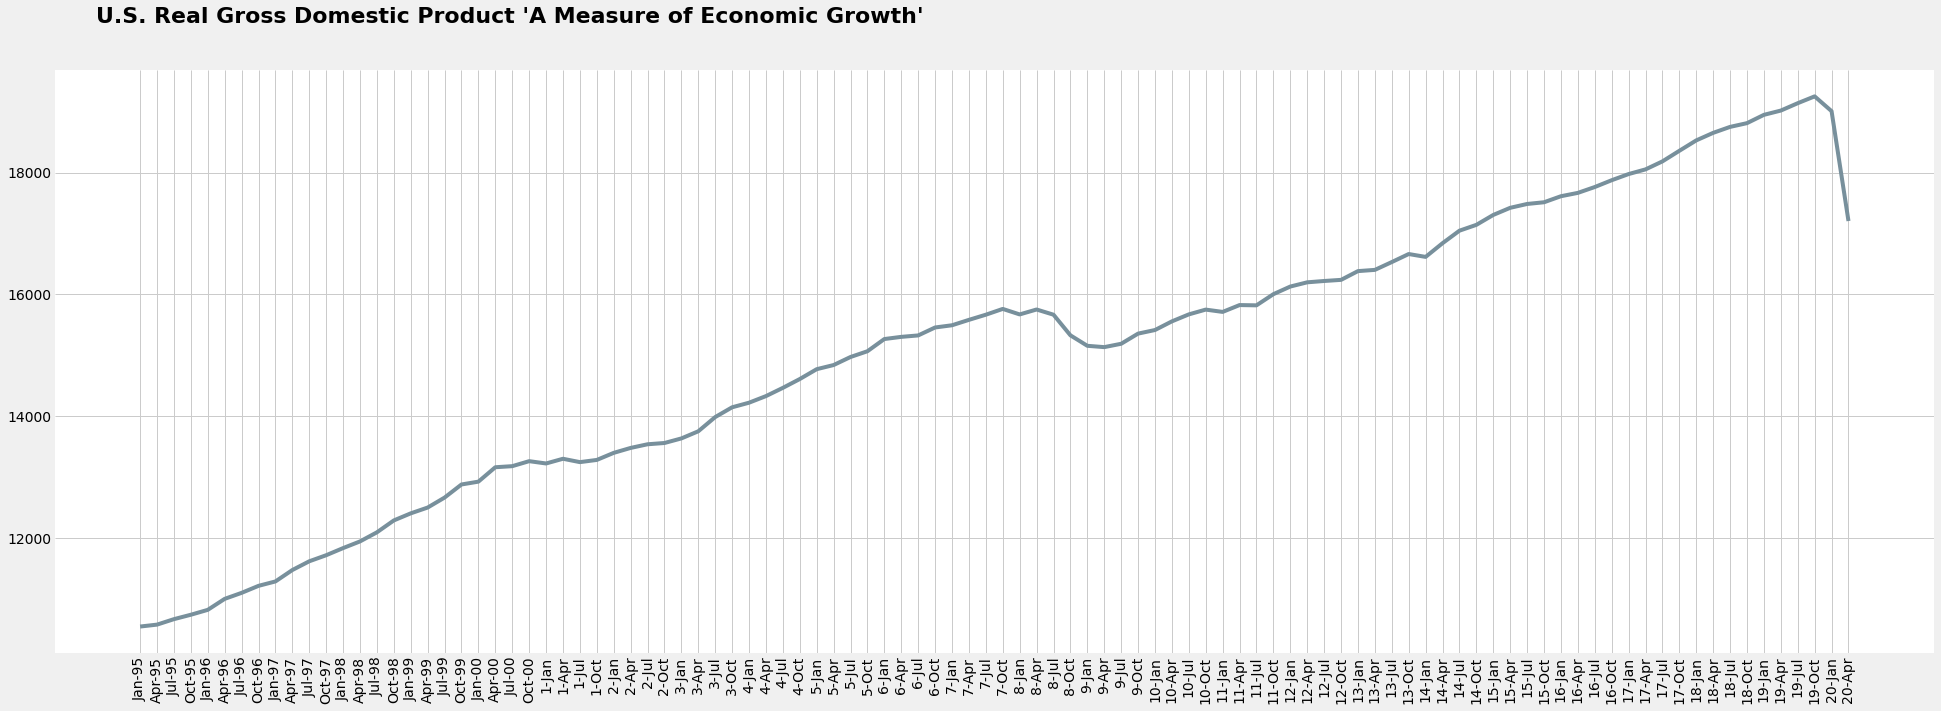

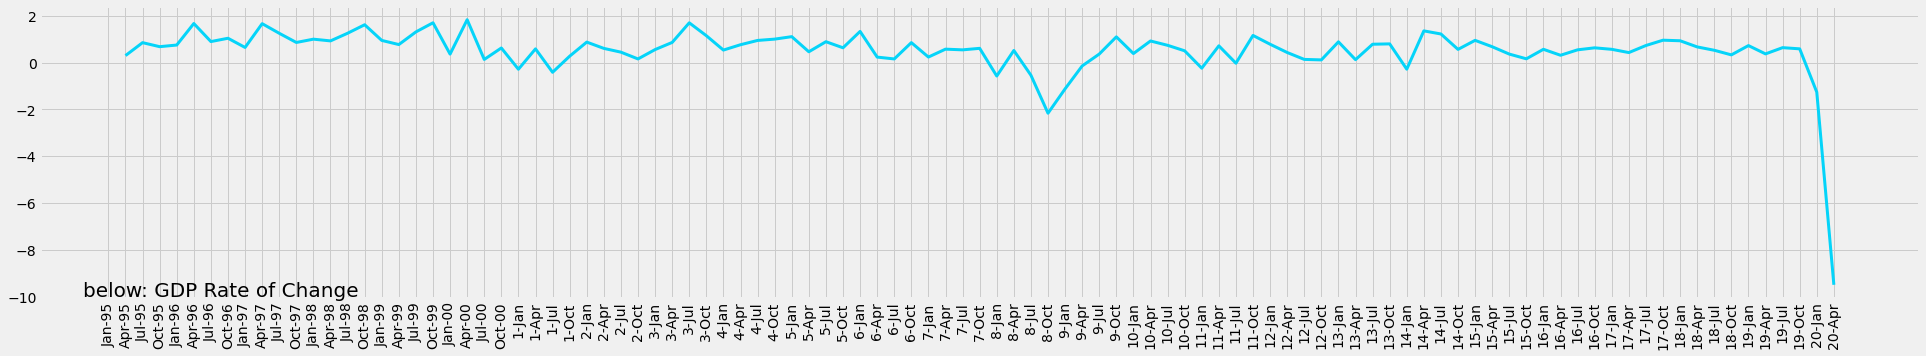

In [ ]:
# GDP BAR CHART and rate of change GDP chart

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,10))  # chart 19.5in x 8

ax.set_title("U.S. Real Gross Domestic Product 'A Measure of Economic Growth'", 
             fontsize=22, fontweight='bold', x=.242, y=1.07)

# plt.bar(qoq['date'], qoq['gdp_qoq'], color='#78909C', width=.7)  # (blue= '#05D4F9')

plt.plot(qoq['date'], qoq['gdp_qoq'], color='#78909C')  # (blue= '#05D4F9')
x = np.arange(102) 

ax.set_xticklabels(qoq['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical
plt.xticks(x, qoq['date'])  # plotting the df['date'] column

plt.xticks(x, qoq['date'])  # plotting the df['date'] column


ax.set_facecolor('w') # grey background/facecolor

# Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# GDP ROC CHART

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,5))  # chart 19.5in x 8

ax.text(s="below: GDP Rate of Change", x=-1.5, y=-10, fontsize=20)

ax.plot(qoq['gdp_roc'], color='#05D4F9', linewidth=3) # orange line plot (orange=#FA805D)
x = np.arange(102) # totals 91 ticks on x-axis
ax.set_xticklabels(qoq['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

plt.xticks(x, qoq['date'])  # plotting the df['date'] column

plt.show()

In [ ]:
qoq.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
97,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329
98,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405


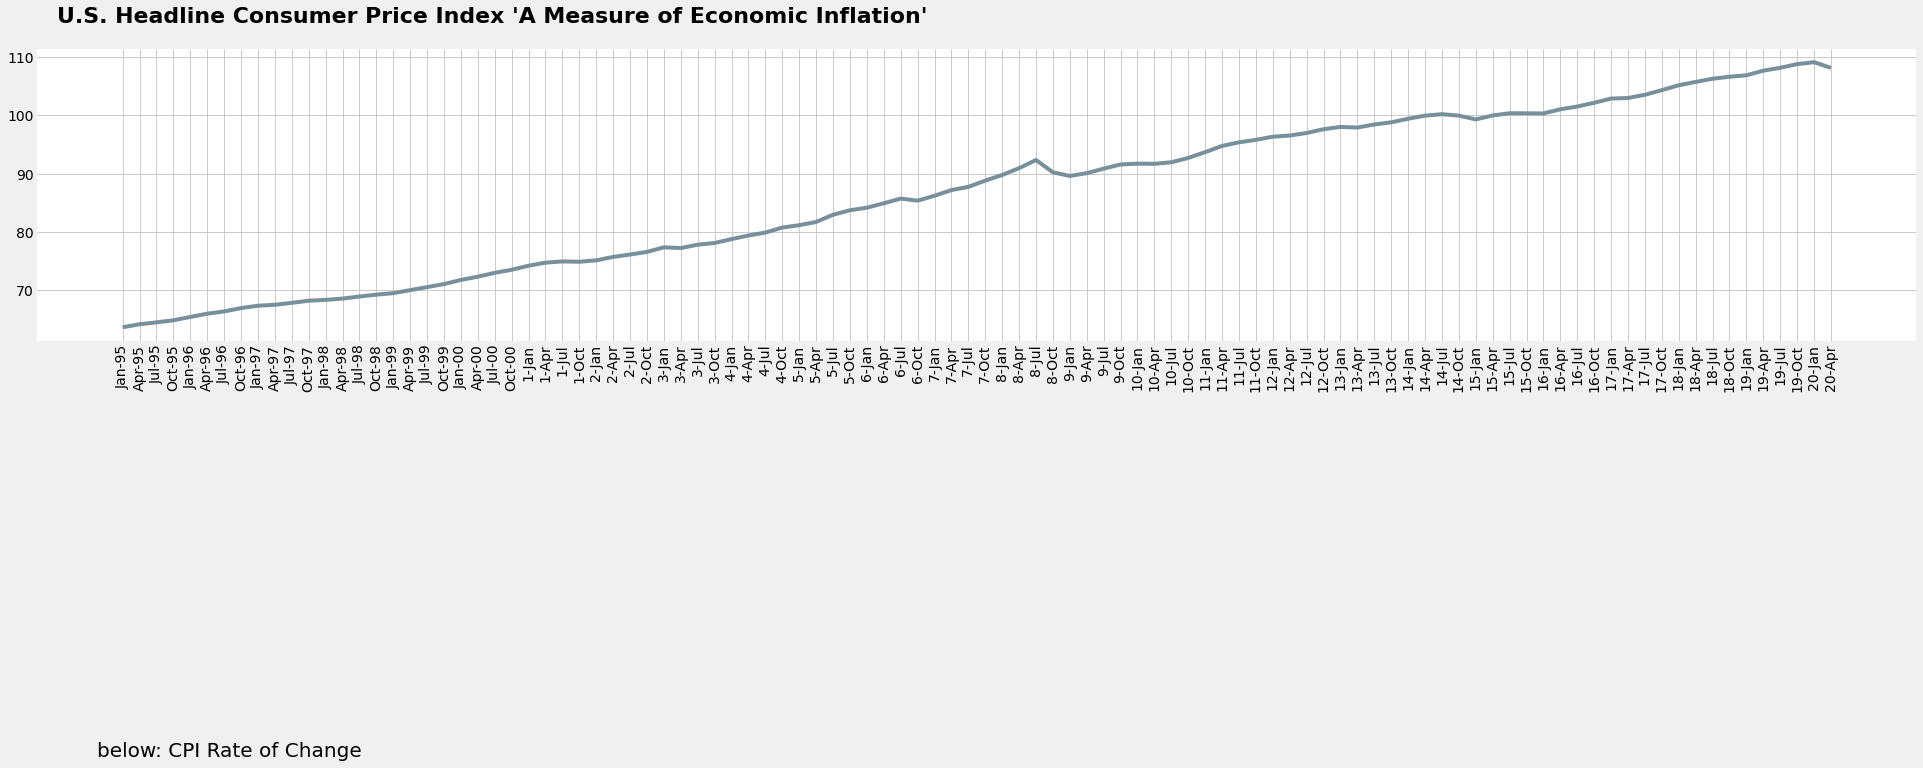

In [ ]:
# CPI rate of change chart

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,5))  # chart 19.5in x 8

ax.set_title("U.S. Headline Consumer Price Index 'A Measure of Economic Inflation'", 
             fontsize=22, fontweight='bold', x=.242, y=1.07)

ax.text(s="below: CPI Rate of Change", x=-1.5, y=-10, fontsize=20)

plt.plot(qoq['date'], qoq['cpi_qoq'], color='#78909C')

# plt.bar(qoq['date'], qoq['cpi_qoq'], color='#78909C', width=.7)  # (blue= '#05D4F9')
x = np.arange(102) # totals 242 ticks on x-axis

ax.set_xticklabels(qoq['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical
plt.xticks(x, qoq['date'])  # plotting the df['date'] column

plt.xticks(x, qoq['date'])  # plotting the df['date'] column


ax.set_facecolor('w') # grey background/facecolor

# Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [ ]:
print(qoq.shape)
qoq.head()

(102, 7)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178


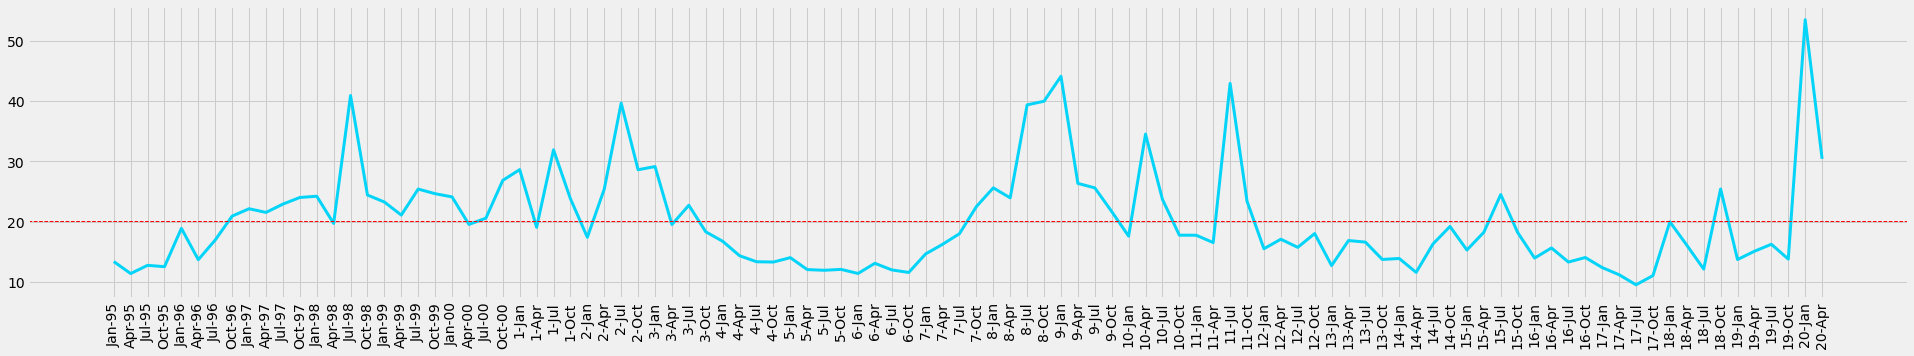

In [ ]:
# VIX quarterly chart plotted

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,5))  # chart 19.5in x 8

ax.plot(qoq['vix'], color='#05D4F9', linewidth=3) # orange line plot (orange=#FA805D)
x = np.arange(102) # totals 102 ticks on x-axis
ax.set_xticklabels(qoq['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

plt.axhline(y=qoq['vix'].mean(), color='r', linestyle='--', linewidth=1)

plt.xticks(x, qoq['date'])  # plotting the df['date'] column

plt.show()

In [ ]:
# Mean of the VIX 

qoq['vix'].mean()

20.185294117647054

In [ ]:
qoq.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178


In [ ]:
qoq.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
gdp_qoq,1.000000,0.981261,-0.135766,0.858546,-0.214290,-0.147634
cpi_qoq,0.981261,1.000000,-0.105003,0.820830,-0.285934,-0.191309
vix,-0.135766,-0.105003,1.000000,-0.113945,-0.328622,-0.218242
sp,0.858546,0.820830,-0.113945,1.000000,-0.251851,-0.118216
gdp_roc,-0.214290,-0.285934,-0.328622,-0.251851,1.000000,0.376048
cpi_roc,-0.147634,-0.191309,-0.218242,-0.118216,0.376048,1.000000


In [ ]:
# Copying dataframe to create new columns to place in a new dataframe for analysis

gdp_vix = qoq[['gdp_roc', 'vix']].copy()
gdp_vix.head()

,gdp_roc,vix
0,NaN,13.37
1,0.298341,11.38
2,0.850678,12.74
3,0.679021,12.52
4,0.748947,18.88


In [ ]:
qoq['gdp_roc'].mean()

0.49319165708910906

In [ ]:
qoq['cpi_roc'].mean()

0.5273286975049505

In [ ]:
# Filling in a NaN value with the mean() of the gdp_roc column

gdp_vix = gdp_vix.fillna(gdp_vix['gdp_roc'].mean())
gdp_vix.head()

,gdp_roc,vix
0,0.493192,13.37
1,0.298341,11.38
2,0.850678,12.74
3,0.679021,12.52
4,0.748947,18.88


In [ ]:
qoq_1 = qoq.copy()
qoq_1.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178


In [ ]:
qoq_1['gdp_roc'] = qoq_1['gdp_roc'].fillna((qoq_1['gdp_roc'].mean()))

In [ ]:
qoq_1['cpi_roc'] = qoq_1['cpi_roc'].fillna((qoq_1['cpi_roc'].mean()))

In [ ]:
qoq_1.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
0,Jan-95,10543.644,63.652256,13.37,470.420013,0.493192,0.527329
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178


In [ ]:
# Preparing dataframe to run a PCA Analysis
# dropping date in order to run a K Means Cluster 

qoq_1_nodate = qoq_1.drop(['date'], axis=1)

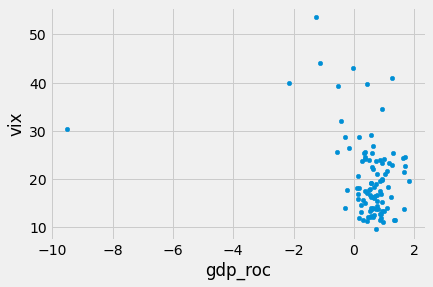

In [ ]:
qoq.plot.scatter('gdp_roc', 'vix')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
avg_sq_distances = []

for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(qoq_1_nodate)  #avg squared distance from points to centroids
  avg_sq_distances.append(kmeans.inertia_)

avg_sq_distances

[602665463.1200727,
 193062559.71820506,
 78480667.41228437,
 42068403.697554715,
 27839224.515511684,
 20435340.148136888,
 15564601.164459312,
 11606633.209892893,
 9808018.187377885]

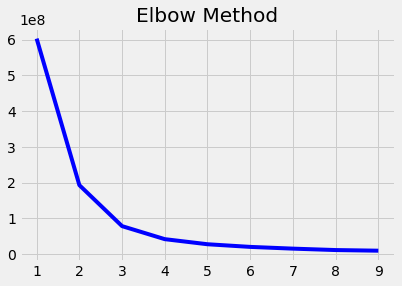

In [ ]:
plt.plot(list(range(1,10)), avg_sq_distances, 'b-')
plt.xticks(list(range(1,10)), list(range(1,10)))
plt.title("Elbow Method")
plt.show()

In [ ]:

scaler = StandardScaler()
Z = scaler.fit_transform(qoq_1_nodate)

Z

array([[-1.92294855e+00, -1.68112663e+00, -8.26675891e-01,
        -1.56671842e+00,  1.91142114e-16, -2.21991290e-16],
       [-1.90953776e+00, -1.64303747e+00, -1.06805726e+00,
        -1.49725298e+00, -1.67732920e-01,  5.80201062e-01],
       [-1.87118467e+00, -1.61936043e+00, -9.03093108e-01,
        -1.42298821e+00,  3.07733694e-01, -4.65375262e-02],
       [-1.84031035e+00, -1.59362451e+00, -9.29778486e-01,
        -1.39249807e+00,  1.59967043e-01,  3.56088009e-02],
       [-1.80602535e+00, -1.55141761e+00, -1.58328483e-01,
        -1.30698765e+00,  2.20161091e-01,  7.23524968e-01],
       [-1.72910344e+00, -1.51024015e+00, -7.89073768e-01,
        -1.27852084e+00,  1.01117605e+00,  6.64873370e-01],
       [-1.68704380e+00, -1.48244536e+00, -3.92432022e-01,
        -1.30082376e+00,  3.47601925e-01,  9.62146434e-02],
       [-1.63791765e+00, -1.44023846e+00,  8.91177445e-02,
        -1.19837439e+00,  4.69314859e-01,  6.82834888e-01],
       [-1.60705868e+00, -1.41038479e+00,  2.371

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(qoq_1_nodate)

print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#  Only PCs that contain 90% of the explained variation

pca = PCA(.9)

# Run PC algo
pca_features = pca.fit_transform(Z)

# print out shape to see how many of the columns were kept

pca_features.shape

(102, 4)

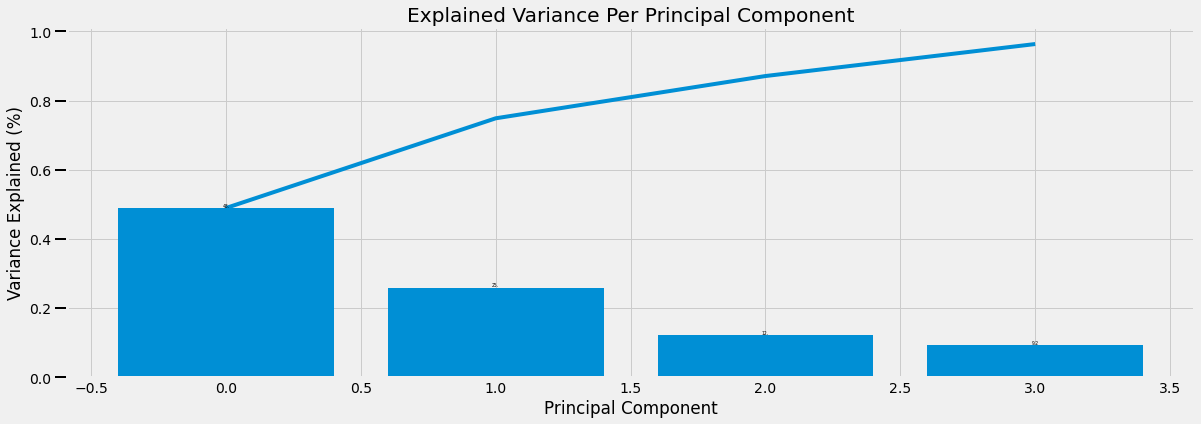

In [ ]:
# Scree Plot
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

scree_plot(pca)

In [ ]:
qoq_1_nodate['clusters'] = kmeans.labels_
qoq_1_nodate.head()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,clusters
0,10543.644,63.652256,13.37,470.420013,0.493192,0.527329,0
1,10575.100,64.172612,11.38,514.710022,0.298341,0.817499,0
2,10665.060,64.496077,12.74,562.059998,0.850678,0.504054,0
3,10737.478,64.847669,12.52,581.500000,0.679021,0.545137,0
4,10817.896,65.424280,18.88,636.020020,0.748947,0.889178,0


In [ ]:
pca_features = pd.DataFrame(pca_features)
pca_features.columns = ['pc1', 'pc2', 'pc3', 'pc4']
pca_features.head()

,pc1,pc2,pc3,pc4
0,-2.821987,0.113538,-0.928153,0.892628
1,-2.804996,-0.256881,-0.606976,1.326644
2,-2.743720,-0.110895,-1.015087,0.654400
3,-2.673574,-0.098047,-0.947881,0.802976
4,-2.748797,-0.039670,0.065736,0.590353


In [ ]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(pca_features) # use .fit()
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
pca_features['clusters'] = kmeans.labels_
pca_features.head()

,pc1,pc2,pc3,pc4,clusters
0,-2.821987,0.113538,-0.928153,0.892628,0
1,-2.804996,-0.256881,-0.606976,1.326644,0
2,-2.743720,-0.110895,-1.015087,0.654400,0
3,-2.673574,-0.098047,-0.947881,0.802976,0
4,-2.748797,-0.039670,0.065736,0.590353,0


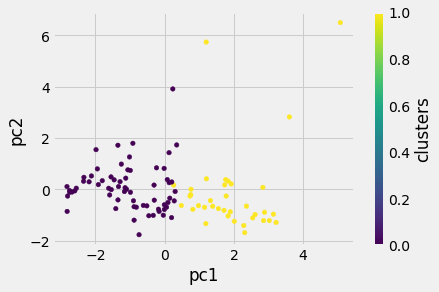

In [ ]:
pca_features.plot.scatter('pc1', 'pc2', c='clusters', cmap='viridis')
plt.show()

## Looking at specific VIX volatility regimes

In [ ]:
# Investable  = 9-15
# Tradable (chop bucket) = 18-28
# Uninvestable: >=31

vix_31 = qoq_1.loc[qoq['vix'] >= 31]
vix_31

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
14,Jul-98,12091.614,68.926139,40.95,1120.670044,1.252567,0.512715
26,1-Jul,13244.784,74.945398,31.93,1211.229980,-0.415038,0.282273
30,2-Jul,13538.072,76.126748,39.69,911.619995,0.444571,0.538633
54,8-Jul,15667.032,92.339790,39.39,1267.380005,-0.541356,1.541881
55,8-Oct,15328.027,90.225033,40.00,968.750000,-2.163811,-2.290190
56,9-Jan,15155.940,89.604403,44.14,825.880005,-1.122695,-0.687870
61,10-Apr,15557.277,91.680062,34.54,1186.689941,0.922028,-0.035269
66,11-Jul,15820.700,95.365593,42.96,1292.280029,-0.027779,0.652066
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712


In [ ]:
vix_31.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
gdp_qoq,1.000000,0.987925,0.675591,0.753731,-0.531447,-0.054295
cpi_qoq,0.987925,1.000000,0.638815,0.667392,-0.529474,-0.075964
vix,0.675591,0.638815,1.000000,0.705481,-0.367894,-0.003783
sp,0.753731,0.667392,0.705481,1.000000,-0.238797,0.201853
gdp_roc,-0.531447,-0.529474,-0.367894,-0.238797,1.000000,0.582910
cpi_roc,-0.054295,-0.075964,-0.003783,0.201853,0.582910,1.000000


In [ ]:
vix = qoq_1.loc[qoq['vix'].between(18 , 28, inclusive=True)]
vix.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
gdp_qoq,1.000000,0.984793,-0.090743,0.793634,-0.421504,-0.067358
cpi_qoq,0.984793,1.000000,-0.090525,0.723207,-0.445358,-0.076040
vix,-0.090743,-0.090525,1.000000,-0.119789,-0.093511,0.180908
sp,0.793634,0.723207,-0.119789,1.000000,-0.242079,-0.056949
gdp_roc,-0.421504,-0.445358,-0.093511,-0.242079,1.000000,-0.075741
cpi_roc,-0.067358,-0.076040,0.180908,-0.056949,-0.075741,1.000000


In [ ]:
vix = qoq_1.loc[qoq['vix'].between(9 , 15, inclusive=True)]
vix.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
gdp_qoq,1.000000,0.983850,-0.078977,0.949708,-0.153533,-0.250461
cpi_qoq,0.983850,1.000000,-0.079045,0.956906,-0.166096,-0.288161
vix,-0.078977,-0.079045,1.000000,-0.119353,-0.110285,0.053227
sp,0.949708,0.956906,-0.119353,1.000000,-0.142365,-0.275687
gdp_roc,-0.153533,-0.166096,-0.110285,-0.142365,1.000000,-0.033657
cpi_roc,-0.250461,-0.288161,0.053227,-0.275687,-0.033657,1.000000


In [ ]:
qoq['date']

0      Jan-95
1      Apr-95
2      Jul-95
3      Oct-95
4      Jan-96
        ...  
97     19-Apr
98     19-Jul
99     19-Oct
100    20-Jan
101    20-Apr
Name: date, Length: 102, dtype: object

## Highlighting different volatility regimes

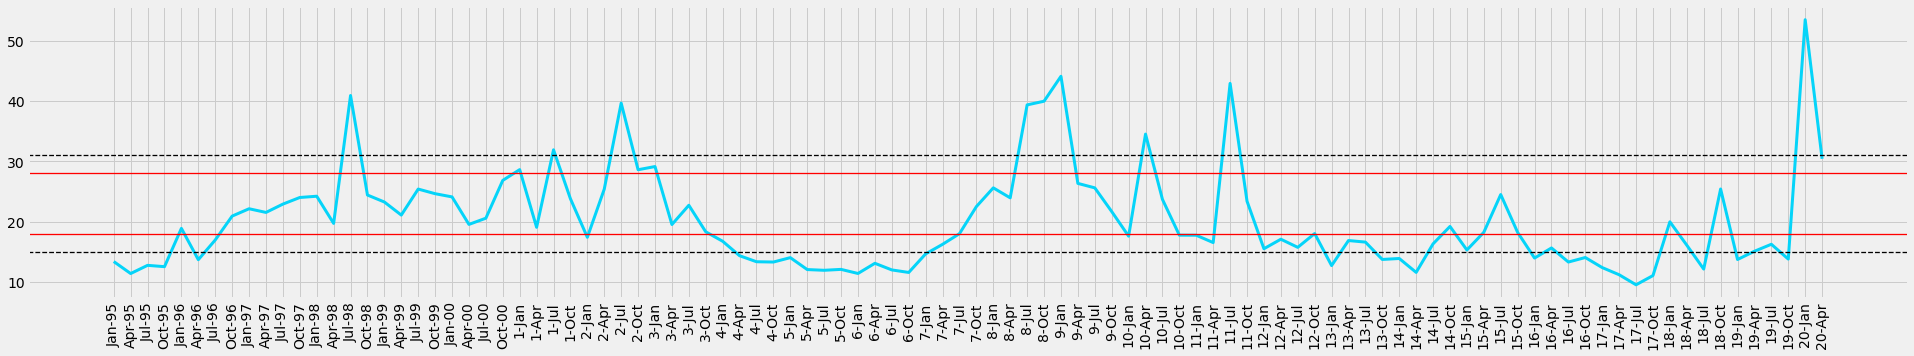

In [ ]:
# VIX quarterly since 1995 with different boundaries. 
# Looking for correlations between VIX and S&P500 when VIX
# is within a particular limit

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,5))  # chart 19.5in x 8

ax.plot(qoq['vix'], color='#05D4F9', linewidth=3) # orange line plot (orange=#FA805D)
x = np.arange(102) # totals 102 ticks on x-axis
ax.set_xticklabels(qoq['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

# plt.axhline(y=qoq['vix'].mean(), color='r', linestyle='--', linewidth=1)
plt.axhline(31, color='black', linestyle='--', linewidth=1.3)
plt.axhline(28, color='red', linestyle='-', linewidth=1.3)
plt.axhline(18, color='red', linestyle='-', linewidth=1.3)
plt.axhline(15, color='black', linestyle='--', linewidth=1.3)
#plt.axhspan(ymin=31, ymax=55, xmin='bottom', xmax='top')

plt.xticks(x, qoq['date'])  # plotting the df['date'] column

#plt.axvspan(xmin='Jan-95', xmax='Apr-20', ymin=31, ymax=55, color='red', alpha=0.5) # Gives a vertical x-axis span
# plt.axhspan(31, 55, color='#CAD5E8')

plt.show()

In [ ]:
# Conditional statement to play with

vix_31 = qoq_1.loc[qoq['vix'] >= 31]
vix_31['date']

14     Jul-98
26      1-Jul
30      2-Jul
54      8-Jul
55      8-Oct
56      9-Jan
61     10-Apr
66     11-Jul
100    20-Jan
Name: date, dtype: object

In [ ]:
# PLAY GRAPH

sp_small = qoq.copy()
sp_small.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178


In [ ]:
sp_small.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc
97,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329
98,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405


In [ ]:
# New dataframe to begin 'normalizing' step

sp_vix_norm = sp_small[['vix', 'sp']]
sp_vix_norm.head()

,vix,sp
0,13.37,470.420013
1,11.38,514.710022
2,12.74,562.059998
3,12.52,581.500000
4,18.88,636.020020


In [ ]:
# Normalizing VIX and S&P500 quarter over quarter

s

df.head()
df.tail()

,0,1
97,0.126505,0.898483
98,0.152850,0.911023
99,0.096979,0.931777
100,1.000000,1.000000
101,0.475131,0.886360


In [ ]:
df['date'] = sp_small['date']
df.head()

,0,1,date
0,0.087667,0.000000,Jan-95
1,0.042471,0.016076,Apr-95
2,0.073359,0.033262,Jul-95
3,0.068362,0.040318,Oct-95
4,0.212809,0.060107,Jan-96


In [ ]:
# Rename dataframe columns

df.columns = ['vix', 'sp', 'date']

df.tail()

,vix,sp,date
97,0.126505,0.898483,19-Apr
98,0.152850,0.911023,19-Jul
99,0.096979,0.931777,19-Oct
100,1.000000,1.000000,20-Jan
101,0.475131,0.886360,20-Apr


In [ ]:
31/ 53.54


0.5790063503922301

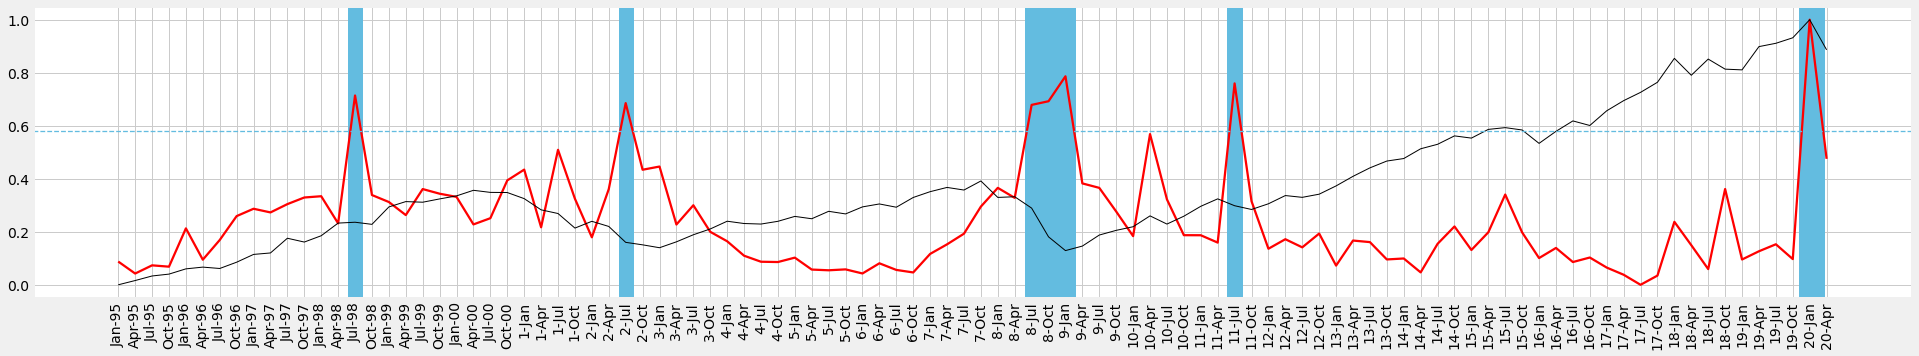

In [ ]:
# Plotting VIX and S&P500 (normalized)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,5))  # chart 19.5in x 8
ax.set_facecolor('w') # grey background/facecolor

ax.plot(df['vix'], color='red', linewidth=2.25) # orange line plot (orange=#FA805D)
x = np.arange(102) # totals 102 ticks on x-axis
ax.set_xticklabels(df['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

plt.xticks(x, df['date'])  # plotting the df['date'] column

#  S&P 500 Quarterly

ax.plot(df['sp'], color='black', linewidth=1, zorder=2) # orange line plot (orange=#FA805D)
x = np.arange(102) # totals 102 ticks on x-axis
ax.set_xticklabels(df['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

plt.xticks(x, df['date'])  # plotting the df['date'] column

#  Horizontal light-blue represents lower-boundary of VIX at 31

plt.axhline(31/ 53.54, color='#63BCE0', linestyle='--', linewidth=1.3) # Marks the lowerbound(VIX at 31)

#  Shades vertically when VIX is >= 31 (normalized horizontal line)
plt.axvspan((13.2+14)/2, (14+14.9)/2, facecolor='#63BCE0')  #vertical shading #9E9E9E(grey)
plt.axvspan((29.20+30)/2, (30+31)/2, facecolor='#63BCE0')  #vertical shading #9E9E9E(grey)
plt.axvspan((53.25+54)/2, (56+57.30)/2, facecolor='#63BCE0')  #vertical shading #9E9E9E(grey)
plt.axvspan((65.10+66)/2, (66+67)/2, facecolor='#63BCE0')  #vertical shading #9E9E9E(grey)
plt.axvspan((98.70+100)/2, (100.85+101)/2, facecolor='#63BCE0')  #vertical shading #9E9E9E(grey)

plt.show()

In [ ]:
# Conditional statement for the vix 

vix_31 = qoq_1.loc[qoq['vix'] >= 31]
vix_31['date']

14     Jul-98
26      1-Jul
30      2-Jul
54      8-Jul
55      8-Oct
56      9-Jan
61     10-Apr
66     11-Jul
100    20-Jan
Name: date, dtype: object

In [ ]:
df_all = pd.read_csv('/content/qoq_1.csv') 
print(df_all.shape)
df_all.head(10)

(102, 14)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178,2.601112,NaN,NaN,2.783915,NaN,NaN,NaN
5,Apr-96,10998.322,65.986828,13.68,654.169983,1.667847,0.859845,4.002061,1.400949,140.094934,2.827087,0.043172,4.317228,NaN
6,Jul-96,11096.976,66.366548,16.95,639.950012,0.896991,0.575448,4.049823,0.047761,4.776106,2.900131,0.073043,7.304340,NaN
7,Oct-96,11212.205,66.943159,20.92,705.270020,1.038382,0.868828,4.421215,0.371393,37.139261,3.231403,0.331272,33.127233,NaN
8,Jan-97,11284.587,67.351006,22.14,786.159973,0.645564,0.609244,4.314064,-0.107151,-10.715071,2.944970,-0.286433,-28.643328,NaN
9,Apr-97,11472.137,67.505706,21.53,801.340027,1.662001,0.229693,4.308066,-0.005998,-0.599813,2.301790,-0.643180,-64.317961,NaN


In [ ]:
# Using specific rows for new df_last8 dataframe 
df_last8 = df_all.iloc[94:103]
df_last8.head(8)

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
94,18-Jul,18752.355,106.271983,12.12,2816.290039,0.525196,0.515448,3.116300,-0.208887,-20.888692,2.658825,-0.019540,-1.954030,50.450001
95,18-Oct,18813.923,106.615700,25.42,2711.739990,0.328321,0.323431,2.475518,-0.640782,-64.078238,2.203168,-0.455657,-45.565680,53.570000
96,19-Jan,18950.347,106.859564,13.71,2704.100098,0.725123,0.228732,2.265802,-0.209716,-20.971605,1.621230,-0.581939,-58.193852,55.009998
97,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329,1.963163,-0.302638,-30.263841,1.827546,0.206317,20.631660,53.389999
98,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246,2.076481,0.113317,11.331723,1.763520,-0.064027,-6.402679,57.709999
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.430000
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712,0.319261,-2.019624,-201.962423,2.105350,0.073275,7.327523,61.160000
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000


In [ ]:
# Using specific rows for new df_6 dataframe 

df_6 = df_last8.iloc[2:8]
df_6.head(6)

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
96,19-Jan,18950.347,106.859564,13.71,2704.100098,0.725123,0.228732,2.265802,-0.209716,-20.971605,1.621230,-0.581939,-58.193852,55.009998
97,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329,1.963163,-0.302638,-30.263841,1.827546,0.206317,20.631660,53.389999
98,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246,2.076481,0.113317,11.331723,1.763520,-0.064027,-6.402679,57.709999
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.430000
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712,0.319261,-2.019624,-201.962423,2.105350,0.073275,7.327523,61.160000
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000


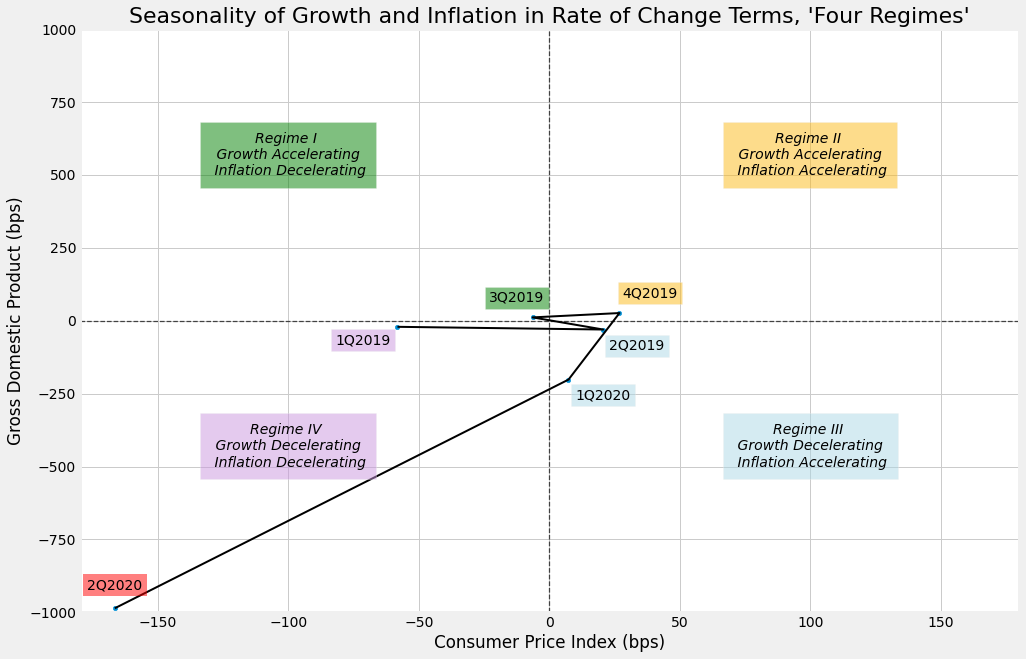

In [ ]:
# Plotting 4 quadrants for GPD and CPI in basis points ( Seasonality of the economy)

plt.style.use('fivethirtyeight')
ax.set_facecolor('white') # grey background/facecolor #343434
plt.rcParams['axes.facecolor']='white'

df_6.plot.scatter('cpi_bps', 'gdp_bps', figsize=(15,10), marker='o')

plt.axhline(y=0, color='#424242', linestyle='--', linewidth=1.25)
plt.axvline(x=0, color='#424242', linestyle='--', linewidth=1.25)

plt.xlim(-180, 180)
plt.ylim(-1000, 1000)

ax.grid(linewidth=.3)

plt.plot(df_6['cpi_bps'], df_6['gdp_bps'], color='black', linewidth=2) # orange line plot (orange=#FA805D)

plt.text(-177, -920,'2Q2020', bbox=dict(facecolor='red', alpha=0.5, edgecolor='none'))
plt.text(10, -270,'1Q2020', bbox=dict(facecolor='lightblue', alpha=0.5))
plt.text(28, 80,'4Q2019', bbox=dict(facecolor='#FDBA18', alpha=0.5))
plt.text(-23, 65,'3Q2019', bbox=dict(facecolor='Green', alpha=0.5))
plt.text(23, -99,'2Q2019', bbox=dict(facecolor='lightblue', alpha=0.5))
plt.text(-82, -80,'1Q2019', bbox=dict(facecolor='#CA96DF', alpha=0.5))
# plt.annotate(text="2Q2020", (df_6['cpi_bps'][0], df_6['gdp_bps'][0])

plt.text(-100, 500, 'Regime I \n Growth Accelerating \n Inflation Decelerating', style='italic', # Regime I label
        bbox={'facecolor': 'Green', 'alpha': 0.5, 'pad': 10}, horizontalalignment='center')

plt.text(100, 500, 'Regime II \n Growth Accelerating \n Inflation Accelerating', style='italic', # Regime II
        bbox={'facecolor': '#FDBA18', 'alpha': 0.5, 'pad': 10}, horizontalalignment='center')

plt.text(100, -500, 'Regime III \n Growth Decelerating \n Inflation Accelerating', style='italic',  # Regime III
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10}, horizontalalignment='center')

plt.text(-100, -500, 'Regime IV \n Growth Decelerating \n Inflation Decelerating', style='italic',  # Regime IV
        bbox={'facecolor': '#CA96DF', 'alpha': 0.5, 'pad': 10}, horizontalalignment='center')

plt.xlabel("Consumer Price Index (bps)")
plt.ylabel("Gross Domestic Product (bps)")
plt.title("Seasonality of Growth and Inflation in Rate of Change Terms, 'Four Regimes'", size=22)

plt.show()

In [ ]:
df_all.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178,2.601112,NaN,NaN,2.783915,NaN,NaN,NaN


In [ ]:
# Using specific rows for new df_all dataframe
df_all = df_all.iloc[6:]
df_all.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
6,Jul-96,11096.976,66.366548,16.95,639.950012,0.896991,0.575448,4.049823,0.047761,4.776106,2.900131,0.073043,7.304340,NaN
7,Oct-96,11212.205,66.943159,20.92,705.270020,1.038382,0.868828,4.421215,0.371393,37.139261,3.231403,0.331272,33.127233,NaN
8,Jan-97,11284.587,67.351006,22.14,786.159973,0.645564,0.609244,4.314064,-0.107151,-10.715071,2.944970,-0.286433,-28.643328,NaN
9,Apr-97,11472.137,67.505706,21.53,801.340027,1.662001,0.229693,4.308066,-0.005998,-0.599813,2.301790,-0.643180,-64.317961,NaN
10,Jul-97,11615.636,67.843235,22.91,954.309998,1.250848,0.500000,4.673886,0.365820,36.581966,2.225048,-0.076743,-7.674261,NaN


In [ ]:
# Creating conditional statement

condition1 = (df_all['gdp_bps'] > 0.0) & (df_all['cpi_bps'] < 0.00)
regime1 = df_all[condition1]
print(regime1.shape)
regime1.head()

(21, 14)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
10,Jul-97,11615.636,67.843235,22.91,954.309998,1.250848,0.500000,4.673886,0.365820,36.581966,2.225048,-0.076743,-7.674261,NaN
12,Jan-98,11832.486,68.349528,24.22,980.280029,0.999480,0.206186,4.855286,0.367427,36.742681,1.482564,-0.408192,-40.819208,NaN
15,Oct-98,12287.000,69.249604,24.42,1098.670044,1.615880,0.469292,4.879111,0.781376,78.137560,1.525773,-0.070413,-7.041253,NaN
28,2-Jan,13397.002,75.128226,17.40,1130.199951,0.874514,0.319249,1.318279,1.164794,116.479356,1.231760,-0.643120,-64.311996,24.90
33,3-Apr,13751.543,77.237779,19.52,916.919983,0.860260,-0.163607,2.028401,0.257475,25.747516,2.005944,-0.970470,-97.046979,19.26


In [ ]:
# Creating conditional statement

condition2 = (df_all['gdp_bps'] > 0.0) & (df_all['cpi_bps'] > 0.00)
regime2 = df_all[condition2]
print(regime2.shape)
regime2.head()

(22, 14)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
6,Jul-96,11096.976,66.366548,16.95,639.950012,0.896991,0.575448,4.049823,0.047761,4.776106,2.900131,0.073043,7.304340,NaN
7,Oct-96,11212.205,66.943159,20.92,705.270020,1.038382,0.868828,4.421215,0.371393,37.139261,3.231403,0.331272,33.127233,NaN
14,Jul-98,12091.614,68.926139,40.95,1120.670044,1.252567,0.512715,4.097735,0.001768,0.176768,1.596186,0.012852,1.285241,NaN
18,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625
19,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625


In [ ]:
regime2.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
gdp_qoq,1.000000,0.987661,-0.613658,0.902450,-0.423788,-0.176037,-0.505992,0.027835,0.027835,-0.293208,0.071157,0.071157,0.925442
cpi_qoq,0.987661,1.000000,-0.630389,0.862449,-0.462875,-0.226863,-0.558828,0.098339,0.098339,-0.329645,0.145458,0.145458,0.893171
vix,-0.613658,-0.630389,1.000000,-0.521832,0.124887,0.045919,0.205869,0.015242,0.015242,-0.253920,-0.004201,-0.004201,-0.568266
sp,0.902450,0.862449,-0.521832,1.000000,-0.263684,-0.055253,-0.166585,-0.246208,-0.246208,-0.180043,-0.160314,-0.160314,0.947539
gdp_roc,-0.423788,-0.462875,0.124887,-0.263684,1.000000,0.272527,0.664963,0.127878,0.127878,0.433447,-0.029248,-0.029248,-0.444836
cpi_roc,-0.176037,-0.226863,0.045919,-0.055253,0.272527,1.000000,0.139239,-0.049080,-0.049080,0.195638,0.022947,0.022947,-0.192518
gdp_roc_qoq,-0.505992,-0.558828,0.205869,-0.166585,0.664963,0.139239,1.000000,-0.442579,-0.442579,0.652075,-0.510621,-0.510621,-0.166487
gdp_first_diff,0.027835,0.098339,0.015242,-0.246208,0.127878,-0.049080,-0.442579,1.000000,1.000000,-0.162515,0.859144,0.859144,-0.361927
gdp_bps,0.027835,0.098339,0.015242,-0.246208,0.127878,-0.049080,-0.442579,1.000000,1.000000,-0.162515,0.859144,0.859144,-0.361927
cpi_roc_qoq,-0.293208,-0.329645,-0.253920,-0.180043,0.433447,0.195638,0.652075,-0.162515,-0.162515,1.000000,-0.230959,-0.230959,-0.270490


In [ ]:
# Creating conditional statement

condition4 = (df_all['gdp_bps'] < 0.00) & (df_all['cpi_bps'] < 0.00)
regime4 = df_all[condition4]
regime4

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
8,Jan-97,11284.587,67.351006,22.14,786.159973,0.645564,0.609244,4.314064,-0.107151,-10.715071,2.944970,-0.286433,-28.643328,NaN
9,Apr-97,11472.137,67.505706,21.53,801.340027,1.662001,0.229693,4.308066,-0.005998,-0.599813,2.301790,-0.643180,-64.317961,NaN
11,Oct-97,11715.393,68.208891,24.01,914.619995,0.858817,0.538972,4.487859,-0.186026,-18.602650,1.890756,-0.334291,-33.429137,NaN
23,Oct-00,13260.506,73.510901,26.85,1429.400024,0.622890,0.712909,2.973483,-1.101848,-110.184750,3.443499,-0.025401,-2.540060,24.312500
24,1-Jan,13222.690,74.214086,28.64,1366.010010,-0.285178,0.956572,2.309710,-0.663773,-66.377312,3.409759,-0.033740,-3.373995,26.718750
25,1-Apr,13299.984,74.734442,19.06,1249.459961,0.584556,0.701156,1.057242,-1.252467,-125.246719,3.324908,-0.084851,-8.485133,26.480000
26,1-Jul,13244.784,74.945398,31.93,1211.229980,-0.415038,0.282273,0.503588,-0.553654,-55.365391,2.678227,-0.646680,-64.668028,25.200001
27,1-Oct,13280.859,74.889143,23.80,1059.780029,0.272371,-0.075061,0.153486,-0.350103,-35.010263,1.874880,-0.803347,-80.334694,25.049999
36,4-Jan,14221.147,78.770721,16.74,1131.130005,0.533747,0.846237,4.304556,-0.021808,-2.180782,1.817851,-0.183985,-18.398525,21.240000
38,4-Jul,14464.984,79.895816,13.34,1101.719971,0.945328,0.637732,3.431595,-0.771425,-77.142472,2.674860,-0.111010,-11.101043,23.180000


In [ ]:
# Creating conditional statement

condition3 = (df_all['gdp_bps'] < 0.00) & (df_all['cpi_bps'] > 0.00)
regime3 = df_all[condition3]
print(regime3.shape)
regime3

(30, 14)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
13,Apr-98,11942.032,68.574547,19.71,1111.750000,0.925807,0.329218,4.095967,-0.759319,-75.931877,1.583333,0.100769,10.076912,NaN
16,Jan-99,12403.293,69.502750,23.26,1279.640015,0.946472,0.365556,4.824067,-0.055044,-5.504420,1.687243,0.161470,16.146959,NaN
17,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875
20,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125
22,Jul-00,13178.419,72.990545,20.57,1430.829956,0.133555,0.913863,4.075330,-1.222407,-122.240731,3.468900,0.175065,17.506541,22.343750
31,2-Oct,13559.032,76.576786,28.62,885.760010,0.154823,0.591169,2.094541,-0.119825,-11.982533,2.253521,0.677240,67.724040,21.299999
32,3-Jan,13634.253,77.364352,29.15,855.700012,0.554767,1.028466,1.770926,-0.323615,-32.361466,2.976413,0.722892,72.289221,20.559999
37,4-Apr,14329.523,79.389523,14.34,1107.300049,0.762076,0.785574,4.203019,-0.101536,-10.153634,2.785870,0.968019,96.801906,21.780001
39,4-Oct,14609.876,80.753701,13.29,1130.199951,1.001674,1.073755,3.281795,-0.149800,-14.980003,3.384948,0.710088,71.008786,21.950001
42,5-Jul,14972.054,82.947637,11.92,1234.180054,0.891334,1.514630,3.505500,-0.055393,-5.539323,3.819750,0.896809,89.680940,22.780001


In [ ]:
# Running Correlation Test

regime4.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
gdp_qoq,1.000000,0.973495,-0.188036,0.822509,-0.255556,-0.244329,-0.262153,-0.213792,-0.213792,-0.299970,-0.146943,-0.146943,0.844725
cpi_qoq,0.973495,1.000000,-0.075990,0.811644,-0.398674,-0.367690,-0.405870,-0.345727,-0.345727,-0.437196,-0.260283,-0.260283,0.864426
vix,-0.188036,-0.075990,1.000000,-0.199935,-0.437310,-0.639354,-0.603299,-0.330327,-0.330327,-0.452189,-0.678598,-0.678598,-0.061093
sp,0.822509,0.811644,-0.199935,1.000000,-0.385042,-0.097890,-0.200033,-0.407557,-0.407557,-0.072749,0.068729,0.068729,0.964438
gdp_roc,-0.255556,-0.398674,-0.437310,-0.385042,1.000000,0.544949,0.856351,0.967401,0.967401,0.400966,0.522046,0.522046,-0.464227
cpi_roc,-0.244329,-0.367690,-0.639354,-0.097890,0.544949,1.000000,0.630675,0.480196,0.480196,0.526091,0.930441,0.930441,-0.270668
gdp_roc_qoq,-0.262153,-0.405870,-0.603299,-0.200033,0.856351,0.630675,1.000000,0.784657,0.784657,0.656782,0.646356,0.646356,-0.270693
gdp_first_diff,-0.213792,-0.345727,-0.330327,-0.407557,0.967401,0.480196,0.784657,1.000000,1.000000,0.281179,0.448083,0.448083,-0.478493
gdp_bps,-0.213792,-0.345727,-0.330327,-0.407557,0.967401,0.480196,0.784657,1.000000,1.000000,0.281179,0.448083,0.448083,-0.478493
cpi_roc_qoq,-0.299970,-0.437196,-0.452189,-0.072749,0.400966,0.526091,0.656782,0.281179,0.281179,1.000000,0.493769,0.493769,-0.231878


In [ ]:
regime4.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
8,Jan-97,11284.587,67.351006,22.14,786.159973,0.645564,0.609244,4.314064,-0.107151,-10.715071,2.944970,-0.286433,-28.643328,NaN
9,Apr-97,11472.137,67.505706,21.53,801.340027,1.662001,0.229693,4.308066,-0.005998,-0.599813,2.301790,-0.643180,-64.317961,NaN
11,Oct-97,11715.393,68.208891,24.01,914.619995,0.858817,0.538972,4.487859,-0.186026,-18.602650,1.890756,-0.334291,-33.429137,NaN
23,Oct-00,13260.506,73.510901,26.85,1429.400024,0.622890,0.712909,2.973483,-1.101848,-110.184750,3.443499,-0.025401,-2.540060,24.31250
24,1-Jan,13222.690,74.214086,28.64,1366.010010,-0.285178,0.956572,2.309710,-0.663773,-66.377312,3.409759,-0.033740,-3.373995,26.71875


In [ ]:
regime4.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
79,14-Oct,17143.038,99.945714,19.20,2018.050049,0.562794,-0.248444,2.876855,-0.240873,-24.087329,1.164006,-0.626965,-62.696454,43.139999
94,18-Jul,18752.355,106.271983,12.12,2816.290039,0.525196,0.515448,3.116300,-0.208887,-20.888692,2.658825,-0.019540,-1.954030,50.450001
95,18-Oct,18813.923,106.615700,25.42,2711.739990,0.328321,0.323431,2.475518,-0.640782,-64.078238,2.203168,-0.455657,-45.565680,53.570000
96,19-Jan,18950.347,106.859564,13.71,2704.100098,0.725123,0.228732,2.265802,-0.209716,-20.971605,1.621230,-0.581939,-58.193852,55.009998
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000


In [ ]:
regime2.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
6,Jul-96,11096.976,66.366548,16.95,639.950012,0.896991,0.575448,4.049823,0.047761,4.776106,2.900131,0.073043,7.304340,NaN
7,Oct-96,11212.205,66.943159,20.92,705.270020,1.038382,0.868828,4.421215,0.371393,37.139261,3.231403,0.331272,33.127233,NaN
14,Jul-98,12091.614,68.926139,40.95,1120.670044,1.252567,0.512715,4.097735,0.001768,0.176768,1.596186,0.012852,1.285241,NaN
18,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625
19,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625


In [ ]:
regime2.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
90,17-Jul,18185.636,103.519579,9.51,2470.300049,0.728834,0.534580,2.371306,0.187445,18.744498,1.981645,0.068555,6.855549,55.18
91,17-Oct,18359.432,104.317412,11.04,2575.260010,0.955677,0.770707,2.703335,0.332029,33.202897,2.120752,0.139107,13.910713,55.32
92,18-Jan,18530.483,105.154764,19.97,2823.810059,0.931679,0.802696,3.077125,0.373790,37.379023,2.219925,0.099173,9.917313,53.09
93,18-Apr,18654.383,105.727015,16.09,2648.050049,0.668628,0.544199,3.325187,0.248062,24.806184,2.678365,0.458440,45.843988,57.82
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.43


In [ ]:
qoq_2 = pd.read_csv('/content/qoq_1.csv')
print(qoq_2.shape)
qoq_2.head(20)

(102, 14)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178,2.601112,NaN,NaN,2.783915,NaN,NaN,NaN
5,Apr-96,10998.322,65.986828,13.68,654.169983,1.667847,0.859845,4.002061,1.400949,140.094934,2.827087,0.043172,4.317228,NaN
6,Jul-96,11096.976,66.366548,16.95,639.950012,0.896991,0.575448,4.049823,0.047761,4.776106,2.900131,0.073043,7.304340,NaN
7,Oct-96,11212.205,66.943159,20.92,705.270020,1.038382,0.868828,4.421215,0.371393,37.139261,3.231403,0.331272,33.127233,NaN
8,Jan-97,11284.587,67.351006,22.14,786.159973,0.645564,0.609244,4.314064,-0.107151,-10.715071,2.944970,-0.286433,-28.643328,NaN
9,Apr-97,11472.137,67.505706,21.53,801.340027,1.662001,0.229693,4.308066,-0.005998,-0.599813,2.301790,-0.643180,-64.317961,NaN


In [ ]:
qoq_2.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
97,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329,1.963163,-0.302638,-30.263841,1.827546,0.206317,20.631660,53.389999
98,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246,2.076481,0.113317,11.331723,1.763520,-0.064027,-6.402679,57.709999
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.430000
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712,0.319261,-2.019624,-201.962423,2.105350,0.073275,7.327523,61.160000
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000


In [ ]:
qoq_2 = qoq_2.iloc[17:103]
qoq_2.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
17,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875
18,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625
19,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625
20,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125
21,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375


In [ ]:
two_yr = pd.read_csv('/content/2yrtre.csv')
two_yr.head()

,date,2yr
0,1/1/1990,8.64
1,4/1/1990,8.24
2,7/1/1990,8.02
3,10/1/1990,7.15
4,1/1/1991,7.02


In [ ]:
print(two_yr.shape)
two_yr.tail()

(122, 2)


,date,2yr
117,4/1/2019,1.75
118,7/1/2019,1.63
119,10/1/2019,1.58
120,1/1/2020,0.23
121,4/1/2020,0.16


In [ ]:
# Renaming columns

two_yr = two_yr.rename(columns = {'2yr': '2yr_rate'})
print(two_yr.shape)
two_yr.head()

(122, 2)


,date,2yr_rate
0,1/1/1990,8.64
1,4/1/1990,8.24
2,7/1/1990,8.02
3,10/1/1990,7.15
4,1/1/1991,7.02


In [ ]:
two_yr = two_yr.iloc[20:123]
print(two_yr.shape)
two_yr.head()

(102, 2)


,date,2yr_rate
20,1/1/1995,6.80
21,4/1/1995,5.79
22,7/1/1995,5.83
23,10/1/1995,5.18
24,1/1/1996,5.79


In [ ]:
two_yr.tail()

,date,2yr_rate
117,4/1/2019,1.75
118,7/1/2019,1.63
119,10/1/2019,1.58
120,1/1/2020,0.23
121,4/1/2020,0.16


In [ ]:
two_yr = two_yr.reset_index(drop=True)
two_yr.head()

,date,2yr_rate
0,1/1/1995,6.80
1,4/1/1995,5.79
2,7/1/1995,5.83
3,10/1/1995,5.18
4,1/1/1996,5.79


In [ ]:
two_yr.tail()

,date,2yr_rate
97,4/1/2019,1.75
98,7/1/2019,1.63
99,10/1/2019,1.58
100,1/1/2020,0.23
101,4/1/2020,0.16


In [ ]:
new = pd.read_csv('/content/qoq_1.csv')
print(new.shape)
new.head()

(102, 14)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178,2.601112,NaN,NaN,2.783915,NaN,NaN,NaN


In [ ]:
new['2yr_rate'] = two_yr['2yr_rate']
print(new.shape)
new.head()

(102, 15)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
0,Jan-95,10543.644,63.652256,13.37,470.420013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80
1,Apr-95,10575.100,64.172612,11.38,514.710022,0.298341,0.817499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.79
2,Jul-95,10665.060,64.496077,12.74,562.059998,0.850678,0.504054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.83
3,Oct-95,10737.478,64.847669,12.52,581.500000,0.679021,0.545137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.18
4,Jan-96,10817.896,65.424280,18.88,636.020020,0.748947,0.889178,2.601112,NaN,NaN,2.783915,NaN,NaN,NaN,5.79


In [ ]:
# Using specific rows for new dataframe 

new = new.iloc[17:103]
print(new.shape)
new.head()


(85, 15)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
17,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53
18,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63
19,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24
20,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50
21,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38


In [ ]:
new.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
97,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329,1.963163,-0.302638,-30.263841,1.827546,0.206317,20.631660,53.389999,1.75
98,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246,2.076481,0.113317,11.331723,1.763520,-0.064027,-6.402679,57.709999,1.63
99,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.430000,1.58
100,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712,0.319261,-2.019624,-201.962423,2.105350,0.073275,7.327523,61.160000,0.23
101,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000,0.16


In [ ]:
# Reseting the index of the dataframe 

new = new.reset_index(drop=True)
print(new.shape)
new.head()

(85, 15)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38


In [ ]:
new.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
80,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329,1.963163,-0.302638,-30.263841,1.827546,0.206317,20.631660,53.389999,1.75
81,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246,2.076481,0.113317,11.331723,1.763520,-0.064027,-6.402679,57.709999,1.63
82,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.430000,1.58
83,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712,0.319261,-2.019624,-201.962423,2.105350,0.073275,7.327523,61.160000,0.23
84,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000,0.16


In [ ]:
# Running Correlation test on data

new.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
gdp_qoq,1.000000,0.973644,-0.243355,0.843598,-0.121232,-0.174446,-0.134137,-0.072527,-0.072527,-0.273730,-0.021375,-0.021375,0.889021,-0.541076
cpi_qoq,0.973644,1.000000,-0.165082,0.773922,-0.219222,-0.227700,-0.263655,-0.128716,-0.128716,-0.334866,-0.049800,-0.049800,0.859675,-0.665815
vix,-0.243355,-0.165082,1.000000,-0.184483,-0.378036,-0.215072,-0.434946,-0.288520,-0.288520,-0.029501,-0.191604,-0.191604,-0.160144,-0.127662
sp,0.843598,0.773922,-0.184483,1.000000,-0.199493,-0.108363,-0.029534,-0.236060,-0.236060,-0.160525,0.007104,0.007104,0.944761,-0.204388
gdp_roc,-0.121232,-0.219222,-0.378036,-0.199493,1.000000,0.393800,0.785053,0.895087,0.895087,0.176990,0.355932,0.355932,-0.241595,0.221422
cpi_roc,-0.174446,-0.227700,-0.215072,-0.108363,0.393800,1.000000,0.393243,0.271957,0.271957,0.509929,0.754511,0.754511,-0.231391,0.348905
gdp_roc_qoq,-0.134137,-0.263655,-0.434946,-0.029534,0.785053,0.393243,1.000000,0.597996,0.597996,0.376489,0.352220,0.352220,-0.136524,0.393914
gdp_first_diff,-0.072527,-0.128716,-0.288520,-0.236060,0.895087,0.271957,0.597996,1.000000,1.000000,0.028329,0.349099,0.349099,-0.229107,0.039134
gdp_bps,-0.072527,-0.128716,-0.288520,-0.236060,0.895087,0.271957,0.597996,1.000000,1.000000,0.028329,0.349099,0.349099,-0.229107,0.039134
cpi_roc_qoq,-0.273730,-0.334866,-0.029501,-0.160525,0.176990,0.509929,0.376489,0.028329,0.028329,1.000000,0.357995,0.357995,-0.322195,0.503055


In [ ]:
two_yr_vix = new[['vix', '2yr_rate']]
two_yr_vix.tail()

,vix,2yr_rate
80,15.08,1.75
81,16.24,1.63
82,13.78,1.58
83,53.54,0.23
84,30.43,0.16


In [ ]:
xpl_vix = new[['vix', 'xpl']]
xpl_vix.head()

,vix,xpl
0,21.09,26.796875
1,25.41,25.515625
2,24.64,24.640625
3,24.11,24.828125
4,19.54,23.234375


In [ ]:
# Normalizing VIX and 2_year Treasury Bond

from sklearn import preprocessing

x = two_yr_vix.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
two_yr_ratenorm = pd.DataFrame(x_scaled)

In [ ]:
two_yr_ratenorm.head()

,0,1
0,0.263002,0.847003
1,0.361117,0.862776
2,0.343629,0.958991
3,0.331592,1.000000
4,0.227799,0.981073


In [ ]:
two_yr_ratenorm['date'] = new['date']
two_yr_ratenorm.head()

,0,1,date
0,0.263002,0.847003,Apr-99
1,0.361117,0.862776,Jul-99
2,0.343629,0.958991,Oct-99
3,0.331592,1.000000,Jan-00
4,0.227799,0.981073,Apr-00


In [ ]:
two_yr_ratenorm.columns = ['vix', '2yr_rate', 'date']
two_yr_ratenorm.head()

,vix,2yr_rate,date
0,0.263002,0.847003,Apr-99
1,0.361117,0.862776,Jul-99
2,0.343629,0.958991,Oct-99
3,0.331592,1.000000,Jan-00
4,0.227799,0.981073,Apr-00


In [ ]:
# Normalizing XPL and VIX 

x = xpl_vix.values   # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xpl_vixnorm = pd.DataFrame(x_scaled)

In [ ]:
xpl_vixnorm.head()

,0,1
0,0.263002,0.174237
1,0.361117,0.145157
2,0.343629,0.125298
3,0.331592,0.129553
4,0.227799,0.093381


In [ ]:
xpl_vixnorm['date'] = new['date']
xpl_vixnorm.head()

,0,1,date
0,0.263002,0.174237,Apr-99
1,0.361117,0.145157,Jul-99
2,0.343629,0.125298,Oct-99
3,0.331592,0.129553,Jan-00
4,0.227799,0.093381,Apr-00


In [ ]:
xpl_vixnorm.columns = ['vix', 'xpl', 'date']
print(xpl_vixnorm.shape)
xpl_vixnorm.head()

(85, 3)


,vix,xpl,date
0,0.263002,0.174237,Apr-99
1,0.361117,0.145157,Jul-99
2,0.343629,0.125298,Oct-99
3,0.331592,0.129553,Jan-00
4,0.227799,0.093381,Apr-00


In [ ]:
two_yr_ratenorm.tail()

,vix,2yr_rate,date
80,0.126505,0.250789,19-Apr
81,0.152850,0.231861,19-Jul
82,0.096979,0.223975,19-Oct
83,1.000000,0.011041,20-Jan
84,0.475131,0.000000,20-Apr


[]

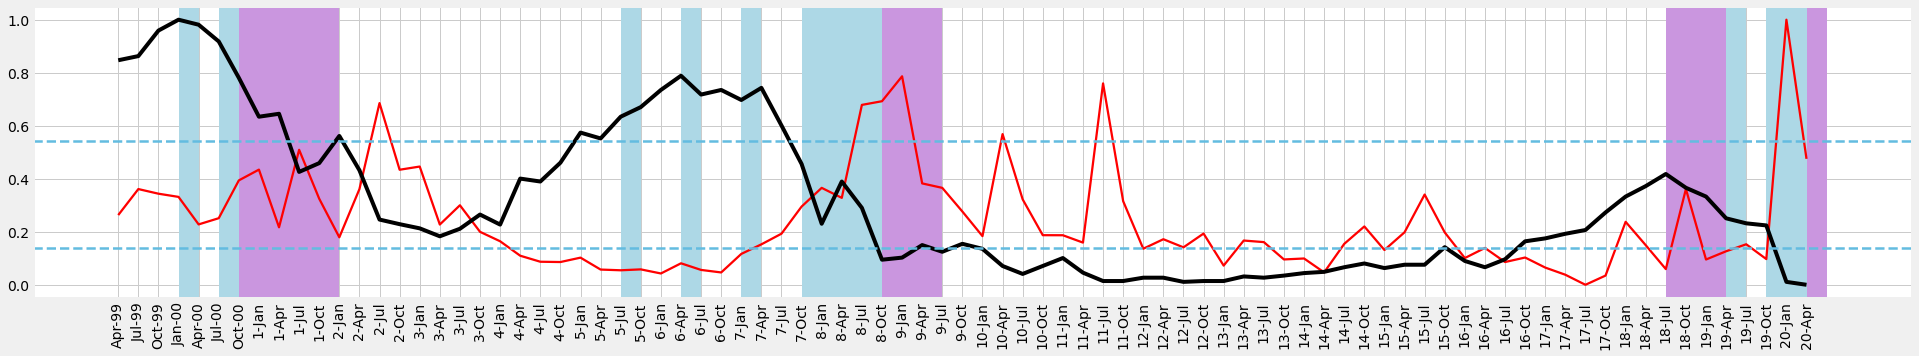

In [ ]:
# Plotting 2 year Treasury Bond Yield

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,5))  # chart 19.5in x 8
ax.set_facecolor('w') # grey background/facecolor

ax.plot(two_yr_ratenorm['vix'], color='red', linewidth=2.25) # orange line plot (orange=#FA805D)
x = np.arange(85) # totals 85 ticks on x-axis
ax.set_xticklabels(two_yr_ratenorm['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

plt.xticks(x, two_yr_ratenorm['date'])  # plotting the df['date'] column


#  2 year Treasury Bond Quarterly

ax.plot(two_yr_ratenorm['2yr_rate'], color='black', linewidth=4, zorder=2) # orange line plot (orange=#FA805D)
x = np.arange(85) # totals 85 ticks on x-axis
ax.set_xticklabels(two_yr_ratenorm['date'], rotation='vertical' )  # x-axis tick labels , rotate to vertical

plt.xticks(x, two_yr_ratenorm['date'])  # plotting the df['date'] column

#  Horizontal light-blue represents lower-boundary of VIX at 31

plt.axhline(29/ 53.54, color='#63BCE0', linestyle='--', linewidth=2.5) # Marks the lowerbound(VIX at 31)
plt.axhline(.14, color='#63BCE0', linestyle='--', linewidth=2.5)

# Color coordinated bar plot

# Regime1
# plt.axvspan(11, 12, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(16, 17, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(18, 19, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(23, 24, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(30, 31, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(33, 34, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(41, 42, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(44, 46, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(50, 52, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(53, 54, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(55, 56, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(58, 59, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(61, 62, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(63, 64, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(72, 73, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(81, 82, facecolor='Green')  #vertical shading #9E9E9E(grey)


# END REGIME 1

# Regime2
# plt.axvspan(1, 3, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(4, 5, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(12, 14, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(17, 18, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(27, 28, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(32, 33, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(42, 44, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(57, 58, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(60, 61, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(69, 71, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(73, 77, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(82, 83, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# END REGIME2

#REGIME3

# plt.axvspan(0, 1, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(3, 4, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(5, 6, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(14, 16, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(20, 21, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(22, 23, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(25, 26, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(28, 29, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(31, 32, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(34, 38, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(46, 50, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(54, 55, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(59, 60, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(64, 69, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(71, 72, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(80, 81, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(82, 83, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(83, 84, facecolor='lightblue')  #vertical shading #9E9E9E(grey)

#END REGIME3

#  Shades vertically during Regime4 'dates' (down GDP, Down CPI)  
plt.axvspan(6, 11, facecolor='#CA96DF') 
# plt.axvspan(19, 20, facecolor='#CA96DF')  
# plt.axvspan(21, 22, facecolor='#CA96DF')  
# plt.axvspan(24, 25, facecolor='#CA96DF')  
# plt.axvspan(26, 27, facecolor='#CA96DF')  
# plt.axvspan(29, 30, facecolor='#CA96DF')  
plt.axvspan(38, 41, facecolor='#CA96DF')  
# plt.axvspan(52, 53, facecolor='#CA96DF')  
# plt.axvspan(56, 57, facecolor='#CA96DF')    
# plt.axvspan(62, 63, facecolor='#CA96DF')  
plt.axvspan(77, 79, facecolor='#CA96DF') 
plt.axvspan(79, 80, facecolor='#CA96DF')
plt.axvspan(84, 85, facecolor='#CA96DF')
#  END of REGIME4

plt.plot()


In [ ]:
# Running a PCA analysis

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

In [ ]:
# df_smaller = two_yr_ratenorm.drop('date', axis=1)
# df_smaller.head()

new_test = new.drop('date', axis=1)
new_test.head()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
0,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53
1,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63
2,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24
3,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50
4,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38


In [ ]:
# Prepping to run an "Elbow Test"

avg_sq_distances = []

for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(new_test)  #avg squared distance from points to centroids
  avg_sq_distances.append(kmeans.inertia_)

avg_sq_distances

[312176724.52638966,
 100610240.76656993,
 37492648.93410536,
 23273537.166672133,
 16681685.333666978,
 12317895.829597482,
 10318516.356955562,
 8685110.032150263,
 7251007.155243512]

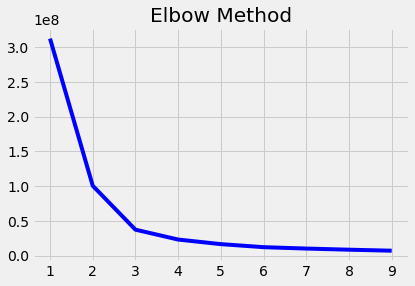

In [ ]:
plt.plot(list(range(1,10)), avg_sq_distances, 'b-')
plt.xticks(list(range(1,10)), list(range(1,10)))
plt.title("Elbow Method")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_test)

print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
new_test['clusters'] = kmeans.labels_
new_test.head()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,clusters
0,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53,0
1,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63,0
2,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24,0
3,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50,0
4,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38,0


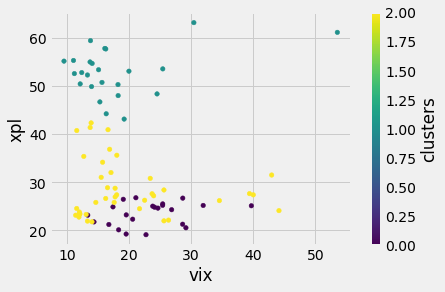

In [ ]:
new_test.plot.scatter('vix', 'xpl', c='clusters', cmap='viridis')
plt.show()

In [ ]:
print(new.shape)
new.head()

(85, 15)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38


In [ ]:
# Creating a conditional for labeling specific Regimes 1, 2, 3, 4

condition1 = (new['gdp_bps'] > 0.0000) & (new['cpi_bps'] < 0.0000)
regime1 = new[condition1]
print(regime1.shape)
regime1.head()

(18, 15)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
11,2-Jan,13397.002,75.128226,17.40,1130.199951,0.874514,0.319249,1.318279,1.164794,116.479356,1.231760,-0.643120,-64.311996,24.900000,3.72
16,3-Apr,13751.543,77.237779,19.52,916.919983,0.860260,-0.163607,2.028401,0.257475,25.747516,2.005944,-0.970470,-97.046979,19.260000,1.32
18,3-Oct,14145.645,78.109728,18.31,1050.709961,1.148167,0.379541,4.326363,1.024556,102.455648,2.001837,-0.215049,-21.504873,20.129999,1.84
23,5-Jan,14771.602,81.161548,14.02,1181.270020,1.106964,0.505051,3.870679,0.588885,58.888485,3.035172,-0.349775,-34.977550,21.799999,3.80
30,6-Oct,15456.928,85.366591,11.56,1377.939941,0.851865,-0.410172,2.590704,0.224202,22.420217,1.965396,-1.374720,-137.471970,24.570000,4.82


In [ ]:
regime1_date = regime1[['date']]
print(regime1_date.shape)
regime1_date.head()

(18, 1)


,date
11,2-Jan
16,3-Apr
18,3-Oct
23,5-Jan
30,6-Oct


In [ ]:
regime1_date['regime'] = 'regime1'
regime1_date.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,regime
11,2-Jan,regime1
16,3-Apr,regime1
18,3-Oct,regime1
23,5-Jan,regime1
30,6-Oct,regime1


In [ ]:
# Creating a conditional for labeling specific Regimes 1, 2, 3, 4

condition2 = (new['gdp_bps'] > 0.0000) & (new['cpi_bps'] > 0.00000)
regime2 = new[condition2]
print(regime2.shape)
regime2.head()

(19, 15)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38
12,2-Apr,13478.152,75.718901,25.40,1076.920044,0.605733,0.786222,1.339611,0.021331,2.133122,1.317275,0.085515,8.551465,25.230000,2.90
13,2-Jul,13538.072,76.126748,39.69,911.619995,0.444571,0.538633,2.214366,0.874755,87.475541,1.576281,0.259006,25.900561,25.129999,1.72


In [ ]:
regime2_date = regime2[['date']]
print(regime2_date.shape)
regime2_date.head()

(19, 1)


,date
1,Jul-99
2,Oct-99
4,Apr-00
12,2-Apr
13,2-Jul


In [ ]:
regime2_date['regime'] = 'regime2'
print(regime2_date.shape)
regime2_date.head()

(19, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,regime
1,Jul-99,regime2
2,Oct-99,regime2
4,Apr-00,regime2
12,2-Apr,regime2
13,2-Jul,regime2


In [ ]:
# Creating a conditional for labeling specific Regimes 1, 2, 3, 4

condition3 = (new['gdp_bps'] < 0.0000) & (new['cpi_bps'] > 0.00000)
regime3 = new[condition3]
print(regime3.shape)
regime3.head()

regime3_date = regime3[['date']]
regime3_date.head()

regime3_date['regime'] = 'regime3'
print(regime3_date.shape)
regime3_date.head()

(28, 15)
(28, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,date,regime
0,Apr-99,regime3
3,Jan-00,regime3
5,Jul-00,regime3
14,2-Oct,regime3
15,3-Jan,regime3


In [ ]:
# Creating a conditional for labeling specific Regimes 1, 2, 3, 4

condition4 = (new['gdp_bps'] < 0.000) & (new['cpi_bps'] < 0.0000)
regime4 = new[condition4]
print(regime4.shape)
regime4.head()

regime4_date = regime4[['date']]
regime4_date.head()

regime4_date['regime'] = 'regime4'
regime4_date.head()

(20, 15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,date,regime
6,Oct-00,regime4
7,1-Jan,regime4
8,1-Apr,regime4
9,1-Jul,regime4
10,1-Oct,regime4


In [ ]:
# new_regime = pd.merge(new, regime1_date, on='date', how='inner')
# print(new_regime.shape)
# new_regime.head()

In [ ]:
by_row = pd.concat([regime1_date, regime2_date, regime3_date, regime4_date])
print(by_row.shape)
by_row.head()

(85, 2)


,date,regime
11,2-Jan,regime1
16,3-Apr,regime1
18,3-Oct,regime1
23,5-Jan,regime1
30,6-Oct,regime1


In [ ]:
new_regime = pd.merge(new, by_row, on='date', how='inner')
print(new_regime.shape)
new_regime.head()

(85, 16)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,regime
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53,regime3
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63,regime2
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24,regime2
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50,regime3
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38,regime2


In [ ]:
# Over the last 20 years Regimes 3 and 4 have occured more frequently than Regimes 1 and 2.

new_regime['regime'].value_counts()

regime3    28
regime4    20
regime2    19
regime1    18
Name: regime, dtype: int64

In [ ]:
two_mon = pd.read_csv('/content/2yr_mon.csv')
print(two_mon.shape)
two_mon.head()

(259, 2)


,date,2yr_mon
0,1-Jan-99,4.58
1,1-Feb-99,5.13
2,1-Mar-99,4.99
3,1-Apr-99,5.08
4,1-May-99,5.42


In [ ]:
t10_qoq = pd.read_csv('/content/GS10_qoq.csv', skiprows=16, skipfooter=1, engine='python')
print(t10_qoq.shape)
t10_qoq.head()

(86, 2)


,1-Oct-98,4.53
0,1-Jan-99,4.72
1,1-Apr-99,5.18
2,1-Jul-99,5.79
3,1-Oct-99,6.11
4,1-Jan-00,6.66


In [ ]:
t10_qoq = t10_qoq.rename(columns={"1-Oct-98": "date", "4.53": "yr_10"})
t10_qoq.head()

,date,yr_10
0,1-Jan-99,4.72
1,1-Apr-99,5.18
2,1-Jul-99,5.79
3,1-Oct-99,6.11
4,1-Jan-00,6.66


In [ ]:
t10_qoq.tail()

,date,yr_10
81,1-Apr-19,2.53
82,1-Jul-19,2.06
83,1-Oct-19,1.71
84,1-Jan-20,1.76
85,1-Apr-20,0.66


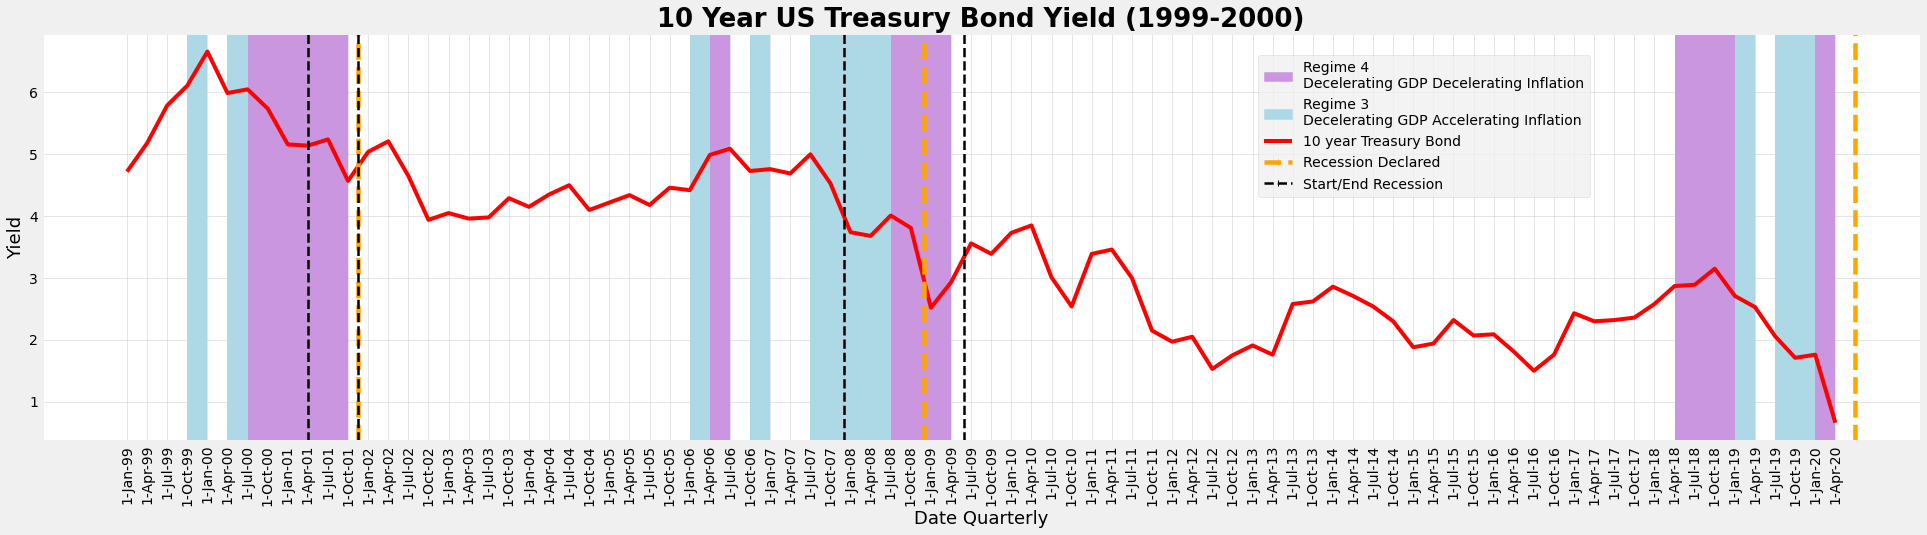

In [ ]:
import matplotlib.patches as mpatches
from matplotlib import lines

# Plotting the 10 year Treasury yield (1999-200)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,7))  # chart 19.5in x 8
ax.set_facecolor('w') # grey background/facecolor

x = np.arange(85) # totals 85 ticks on x-axis
ax.set_xticklabels(t10_qoq['date'], rotation='vertical')  # x-axis tick labels , rotate to vertical

plt.xticks(x, t10_qoq['date'])  # plotting the df['date'] 

# 10_year_Bond_qoq
ax.plot(t10_qoq['date'], t10_qoq['yr_10'], color='red', linewidth=4)
x = np.arange(86)
ax.set_xticklabels(t10_qoq['date'], rotation='vertical')

plt.xticks(x, t10_qoq['date'])  # plotting the df['date'] column

# Color coordinated bar plot

# Regime1
# plt.axvspan(11, 12, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(16, 17, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(18, 19, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(23, 24, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(30, 31, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(33, 34, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(41, 42, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(44, 46, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(50, 52, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(53, 54, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(55, 56, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(58, 59, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(61, 62, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(63, 64, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(72, 73, facecolor='Green')  #vertical shading #9E9E9E(grey)
# plt.axvspan(81, 82, facecolor='Green')  #vertical shading #9E9E9E(grey)


# END REGIME 1

# Regime2
# plt.axvspan(1, 3, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(4, 5, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(12, 14, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(17, 18, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(27, 28, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(32, 33, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(42, 44, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(57, 58, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(60, 61, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(69, 71, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(73, 77, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# plt.axvspan(82, 83, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# END REGIME2

#REGIME3

# plt.axvspan(0, 1, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(3, 4, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(5, 6, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(14, 16, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(20, 21, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(22, 23, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(25, 26, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(28, 29, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(31, 32, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(34, 38, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(46, 50, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(54, 55, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(59, 60, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(64, 69, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(71, 72, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(80, 81, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(82, 83, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(83, 84, facecolor='lightblue')  #vertical shading #9E9E9E(grey)

#END REGIME3

#  Shades vertically during Regime4 'dates' (down GDP, Down CPI)  
plt.axvspan(6, 11, facecolor='#CA96DF') 
# plt.axvspan(19, 20, facecolor='#CA96DF')  
# plt.axvspan(21, 22, facecolor='#CA96DF')  
# plt.axvspan(24, 25, facecolor='#CA96DF')  
# plt.axvspan(26, 27, facecolor='#CA96DF')  
plt.axvspan(29, 30, facecolor='#CA96DF')  
plt.axvspan(38, 41, facecolor='#CA96DF')  
# plt.axvspan(52, 53, facecolor='#CA96DF')  
# plt.axvspan(56, 57, facecolor='#CA96DF')    
# plt.axvspan(62, 63, facecolor='#CA96DF')  
plt.axvspan(77, 79, facecolor='#CA96DF') 
plt.axvspan(79, 80, facecolor='#CA96DF')
plt.axvspan(84, 85, facecolor='#CA96DF')
#  END of REGIME4

#2001 financial crash (begin, declared, end)

ax.axvline(9, color='black', linestyle='--', linewidth=2.5)
ax.axvline(11.5, color='orange', linestyle='--', linewidth=4.5)
ax.axvline(11.5, color='black', linestyle='--', linewidth=2.5)

#2008 financial crash (begin, declared, end)

ax.axvline(35.66, color='black', linestyle='--', linewidth=2.5)
ax.axvline(39.66, color='orange', linestyle='--', linewidth=4.5)
ax.axvline(41.66, color='black', linestyle='--', linewidth=2.5)

# 2020 recession (june 9, 2020 - declared)

ax.axvline(86, color='orange', linestyle='--', linewidth=4.5)

plt.xlabel("Date Quarterly", size=18)
plt.ylabel("Yield", size=18)
plt.title("10 Year US Treasury Bond Yield (1999-2000)", size=26, fontweight='bold')

ax.grid(linewidth=.5)
red_line = lines.Line2D([],[], color='red', linestyle='-', linewidth=4, label='10 year Treasury Bond')
vertical_line1 = lines.Line2D([],[], color='orange', marker='|', linestyle='--', linewidth=4.5, label='Recession Declared')
vertical_line2 = lines.Line2D([],[], color='black', marker='|', linestyle='--', linewidth=2.5, label='Start/End Recession')
blue_patch = mpatches.Patch(color='lightblue', label='Regime 3 \nDecelerating GDP Accelerating Inflation')
purple_patch = mpatches.Patch(color='#CA96DF', label='Regime 4 \nDecelerating GDP Decelerating Inflation')

plt.legend(handles=[purple_patch, blue_patch, red_line, vertical_line1, vertical_line2], bbox_to_anchor=(.80, .85),
           bbox_transform=plt.gcf().transFigure)

plt.show()

In [ ]:
gold_qoq = pd.read_csv('/content/gold_qoq.csv', skipfooter=1, engine='python')
print(gold_qoq.shape)
gold_qoq.head()

(86, 2)


,date,price
0,1999-01,287.333
1,1999-04,282.620
2,1999-07,256.198
3,1999-10,311.562
4,2000-01,284.590


In [ ]:
gold_qoq.tail()

,date,price
81,2019-04,1287.650
82,2019-07,1414.611
83,2019-10,1494.765
84,2020-01,1560.668
85,2020-04,1680.030


In [ ]:
spread = pd.read_csv('/content/10-3 yr spread.csv')
spread.head()

,date,10_3sp
0,1-Jan-99,0.18
1,1-Apr-99,0.22
2,1-Jul-99,0.20
3,1-Oct-99,0.16
4,1-Jan-00,-0.41


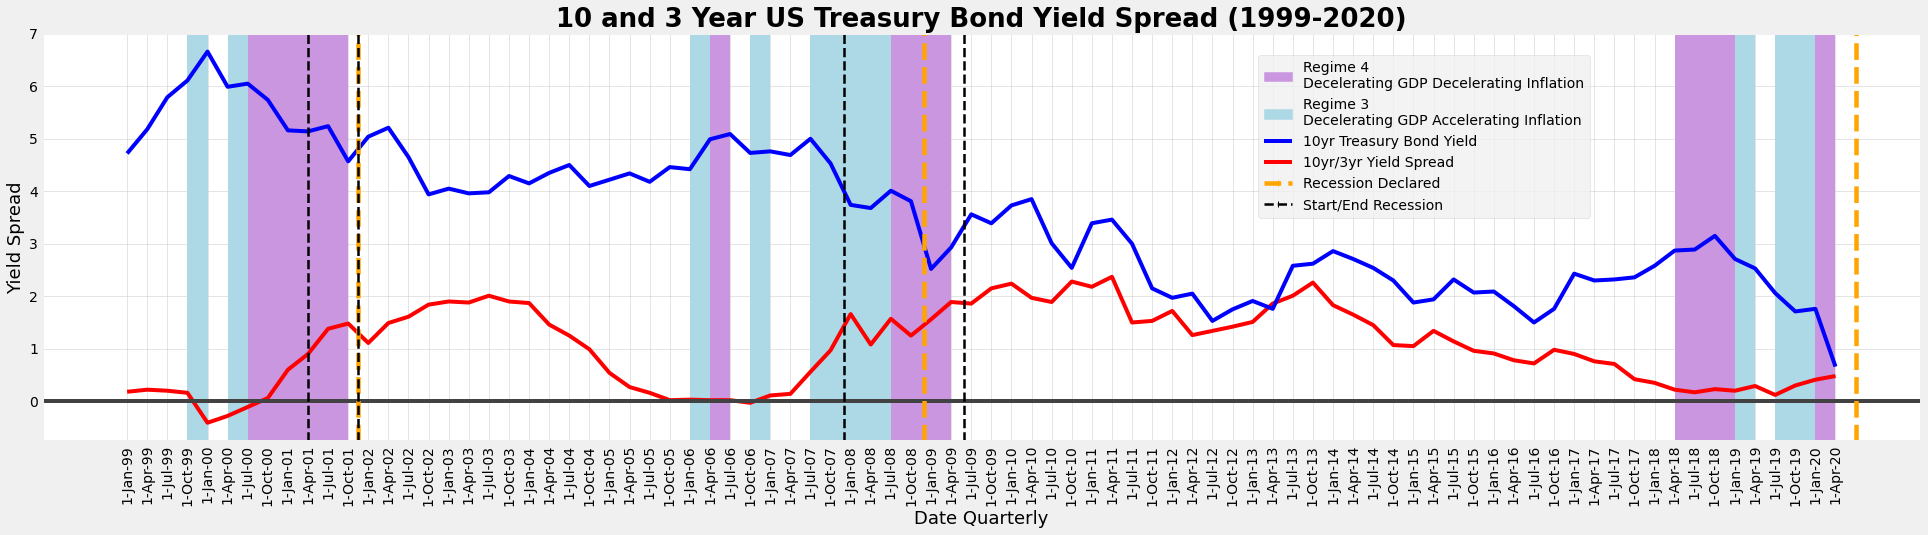

In [ ]:
# 10_year_Bond_qoq minus 3_year Bond yield = 10-3 Spread of the yields

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,7))  # chart 19.5in x 8
ax.set_facecolor('white') # grey background/facecolor

x = np.arange(85) # totals 85 ticks on x-axis
ax.set_xticklabels(spread['date'], rotation='vertical')  # x-axis tick labels , rotate to vertical

plt.xticks(x, spread['date'])

ax.plot(spread['date'],spread['10_3sp'], color='red', linewidth=4)
x = np.arange(86)
ax.set_xticklabels(spread['date'], rotation='vertical')

#  10-3 year Treasury Bond Quarterly Spread

plt.xticks(x, spread['date'])  # plotting the df['date'] column


# 10 year Treasury Bond Rate

ax.plot(t10_qoq['date'], t10_qoq['yr_10'], color='blue', linewidth=4)
x = np.arange(86)
ax.set_xticklabels(t10_qoq['date'], rotation='vertical')

plt.xticks(x, t10_qoq['date'])  # plotting the df['date'] column

# Color coordinated bar plot

#REGIME3

# plt.axvspan(0, 1, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(3, 4, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(5, 6, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(14, 16, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(20, 21, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(22, 23, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(25, 26, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(28, 29, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(31, 32, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(34, 38, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(46, 50, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(54, 55, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(59, 60, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(64, 69, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
# plt.axvspan(71, 72, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(80, 81, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(82, 83, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(83, 84, facecolor='lightblue')  #vertical shading #9E9E9E(grey)

#END REGIME3

#  Shades vertically during Regime4 'dates' (down GDP, Down CPI)  
plt.axvspan(6, 11, facecolor='#CA96DF') 
# plt.axvspan(19, 20, facecolor='#CA96DF')  
# plt.axvspan(21, 22, facecolor='#CA96DF')  
# plt.axvspan(24, 25, facecolor='#CA96DF')  
# plt.axvspan(26, 27, facecolor='#CA96DF')  
plt.axvspan(29, 30, facecolor='#CA96DF')  
plt.axvspan(38, 41, facecolor='#CA96DF')  
# plt.axvspan(52, 53, facecolor='#CA96DF')  
# plt.axvspan(56, 57, facecolor='#CA96DF')    
# plt.axvspan(62, 63, facecolor='#CA96DF')  
plt.axvspan(77, 79, facecolor='#CA96DF') 
plt.axvspan(79, 80, facecolor='#CA96DF')
plt.axvspan(84, 85, facecolor='#CA96DF')
#  END of REGIME4

# Horizontal line at y = 0

plt.axhline(y=0, color='#424242', linestyle='-', linewidth=4)

#2001 financial crash (begin, declared, end)

ax.axvline(9, color='black', linestyle='--', linewidth=2.5)
ax.axvline(11.5, color='orange', linestyle='--', linewidth=4.5)
ax.axvline(11.5, color='black', linestyle='--', linewidth=2.5)

#2008 financial crash (begin, declared, end)

ax.axvline(35.66, color='black', linestyle='--', linewidth=2.5)
ax.axvline(39.66, color='orange', linestyle='--', linewidth=4.5)
ax.axvline(41.66, color='black', linestyle='--', linewidth=2.5)

# 2020 recession (june 9, 2020 - declared)

ax.axvline(86, color='orange', linestyle='--', linewidth=4.5)

plt.xlabel("Date Quarterly", size=18)
plt.ylabel("Yield Spread", size=18)
plt.title("10 and 3 Year US Treasury Bond Yield Spread (1999-2020)", size=26, fontweight='bold')

# ax.grid(False)
ax.grid(linewidth=.5)

blue_line = lines.Line2D([],[], color='blue', linestyle='-', linewidth=4, label='10yr Treasury Bond Yield')
red_line = lines.Line2D([],[], color='red', linestyle='-', linewidth=4, label='10yr/3yr Yield Spread')
vertical_line1 = lines.Line2D([],[], color='orange', marker='|', linestyle='--', linewidth=4.5, label='Recession Declared')
vertical_line2 = lines.Line2D([],[], color='black', marker='|', linestyle='--', linewidth=2.5, label='Start/End Recession')
blue_patch = mpatches.Patch(color='lightblue', label='Regime 3 \nDecelerating GDP Accelerating Inflation')
purple_patch = mpatches.Patch(color='#CA96DF', label='Regime 4 \nDecelerating GDP Decelerating Inflation')

plt.legend(handles=[purple_patch, blue_patch, blue_line, red_line, vertical_line1, vertical_line2], bbox_to_anchor=(.80, .85),
           bbox_transform=plt.gcf().transFigure)

plt.show()

In [ ]:
spread.shape

(86, 2)

In [ ]:
spread_new = spread.copy()
spread_new.head()

,date,10_3sp
0,1-Jan-99,0.18
1,1-Apr-99,0.22
2,1-Jul-99,0.20
3,1-Oct-99,0.16
4,1-Jan-00,-0.41


In [ ]:
new_regime.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,regime
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53,regime3
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63,regime2
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24,regime2
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50,regime3
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38,regime2


In [ ]:
spread_corr_test = new_regime.copy()
print(spread_corr_test.shape)
spread_corr_test.head()

(85, 16)


,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,regime
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53,regime3
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63,regime2
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24,regime2
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50,regime3
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38,regime2


In [ ]:
print(spread_new.shape)
spread_new.head()

(86, 2)


,date,10_3sp
0,1-Jan-99,0.18
1,1-Apr-99,0.22
2,1-Jul-99,0.20
3,1-Oct-99,0.16
4,1-Jan-00,-0.41


In [ ]:
spread_new = spread_new.iloc[1:87]
spread_new.head()

,date,10_3sp
1,1-Apr-99,0.22
2,1-Jul-99,0.20
3,1-Oct-99,0.16
4,1-Jan-00,-0.41
5,1-Apr-00,-0.28


In [ ]:
spread_new = spread_new.reset_index(drop=True)
print(spread_new.shape)
spread_new.head()

(85, 2)


,date,10_3sp
0,1-Apr-99,0.22
1,1-Jul-99,0.20
2,1-Oct-99,0.16
3,1-Jan-00,-0.41
4,1-Apr-00,-0.28


In [ ]:
spread_new = spread_new.drop(['date'], axis=1)
spread_new.head()

,10_3sp
0,0.22
1,0.20
2,0.16
3,-0.41
4,-0.28


In [ ]:
spread_corr_test['10_3sp'] = pd.Series(spread_new['10_3sp'])
spread_corr_test.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,regime,10_3sp
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53,regime3,0.22
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63,regime2,0.20
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24,regime2,0.16
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50,regime3,-0.41
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38,regime2,-0.28


In [ ]:
spread_corr_test.corr()

,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,10_3sp
gdp_qoq,1.000000,0.973644,-0.243355,0.843598,-0.121232,-0.174446,-0.134137,-0.072527,-0.072527,-0.273730,-0.021375,-0.021375,0.889021,-0.541076,-0.109249
cpi_qoq,0.973644,1.000000,-0.165082,0.773922,-0.219222,-0.227700,-0.263655,-0.128716,-0.128716,-0.334866,-0.049800,-0.049800,0.859675,-0.665815,0.040063
vix,-0.243355,-0.165082,1.000000,-0.184483,-0.378036,-0.215072,-0.434946,-0.288520,-0.288520,-0.029501,-0.191604,-0.191604,-0.160144,-0.127662,0.198761
sp,0.843598,0.773922,-0.184483,1.000000,-0.199493,-0.108363,-0.029534,-0.236060,-0.236060,-0.160525,0.007104,0.007104,0.944761,-0.204388,-0.428295
gdp_roc,-0.121232,-0.219222,-0.378036,-0.199493,1.000000,0.393800,0.785053,0.895087,0.895087,0.176990,0.355932,0.355932,-0.241595,0.221422,0.017687
cpi_roc,-0.174446,-0.227700,-0.215072,-0.108363,0.393800,1.000000,0.393243,0.271957,0.271957,0.509929,0.754511,0.754511,-0.231391,0.348905,-0.100652
gdp_roc_qoq,-0.134137,-0.263655,-0.434946,-0.029534,0.785053,0.393243,1.000000,0.597996,0.597996,0.376489,0.352220,0.352220,-0.136524,0.393914,-0.242326
gdp_first_diff,-0.072527,-0.128716,-0.288520,-0.236060,0.895087,0.271957,0.597996,1.000000,1.000000,0.028329,0.349099,0.349099,-0.229107,0.039134,0.204397
gdp_bps,-0.072527,-0.128716,-0.288520,-0.236060,0.895087,0.271957,0.597996,1.000000,1.000000,0.028329,0.349099,0.349099,-0.229107,0.039134,0.204397
cpi_roc_qoq,-0.273730,-0.334866,-0.029501,-0.160525,0.176990,0.509929,0.376489,0.028329,0.028329,1.000000,0.357995,0.357995,-0.322195,0.503055,-0.305903


In [ ]:
print(t10_qoq.shape)
t10_qoq.head()

(86, 2)


,date,yr_10
0,1-Jan-99,4.72
1,1-Apr-99,5.18
2,1-Jul-99,5.79
3,1-Oct-99,6.11
4,1-Jan-00,6.66


In [ ]:
t10_qoq_new = t10_qoq.drop(['date'], axis=1)
t10_qoq_new.head()

,yr_10
0,4.72
1,5.18
2,5.79
3,6.11
4,6.66


In [ ]:
t10_qoq_new = t10_qoq_new.iloc[1:87]
t10_qoq_new

,yr_10
1,5.18
2,5.79
3,6.11
4,6.66
5,5.99
...,...
81,2.53
82,2.06
83,1.71
84,1.76


In [ ]:
t10_qoq_new.reset_index(drop=True)
t10_qoq_new.head()

,yr_10
1,5.18
2,5.79
3,6.11
4,6.66
5,5.99


In [ ]:
spread_corr_test['yr_10'] = pd.Series(t10_qoq_new['yr_10'])
spread_corr_test.head()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,regime,10_3sp,yr_10
0,Apr-99,12498.694,70.023107,21.09,1335.180054,0.769159,0.748685,4.661368,-0.162699,-16.269904,2.112387,0.425144,42.514441,26.796875,5.53,regime3,0.22,NaN
1,Jul-99,12662.385,70.543463,25.41,1328.719971,1.309665,0.743121,4.720387,0.059020,5.901969,2.346460,0.234073,23.407271,25.515625,5.63,regime2,0.20,5.18
2,Oct-99,12877.593,71.063820,24.64,1362.930054,1.699585,0.737640,4.806649,0.086262,8.626210,2.619821,0.273361,27.336136,24.640625,6.24,regime2,0.16,5.79
3,Jan-00,12924.179,71.767004,24.11,1394.459961,0.361760,0.989511,4.199578,-0.607071,-60.707101,3.257790,0.637969,63.796910,24.828125,6.50,regime3,-0.41,6.11
4,Apr-00,13160.842,72.329552,19.54,1452.430054,1.831165,0.783853,5.297738,1.098159,109.815922,3.293834,0.036044,3.604374,23.234375,6.38,regime2,-0.28,6.66


In [ ]:
spread_corr_test.tail()

,date,gdp_qoq,cpi_qoq,vix,sp,gdp_roc,cpi_roc,gdp_roc_qoq,gdp_first_diff,gdp_bps,cpi_roc_qoq,cpi_first_diff,cpi_bps,xpl,2yr_rate,regime,10_3sp,yr_10
80,19-Apr,19020.599,107.659226,15.08,2945.830078,0.370716,0.748329,1.963163,-0.302638,-30.263841,1.827546,0.206317,20.631660,53.389999,1.75,regime3,0.29,2.71
81,19-Jul,19141.744,108.146110,16.24,2980.379883,0.636915,0.452246,2.076481,0.113317,11.331723,1.763520,-0.064027,-6.402679,57.709999,1.63,regime1,0.12,2.53
82,19-Oct,19253.959,108.782211,13.78,3037.560059,0.586232,0.588186,2.338885,0.262404,26.240435,2.032075,0.268556,26.855565,59.430000,1.58,regime2,0.30,2.06
83,20-Jan,19010.848,109.109332,53.54,3225.520020,-1.262655,0.300712,0.319261,-2.019624,-201.962423,2.105350,0.073275,7.327523,61.160000,0.23,regime3,0.41,1.71
84,20-Apr,17205.822,108.133453,30.43,2912.429932,-9.494716,-0.894405,-9.541114,-9.860374,-986.037447,0.440490,-1.664861,-166.486092,63.180000,0.16,regime4,0.48,1.76


##New PROJECT

In [ ]:
spread_corr_test['gdp_bps'].rolling(15).corr(spread_corr_test['cpi_bps']).loc[15:]

15   -0.078355
16   -0.152180
17   -0.096702
18   -0.064341
19   -0.092630
        ...   
80    0.262818
81    0.290101
82    0.469774
83    0.235580
84    0.762985
Length: 70, dtype: float64

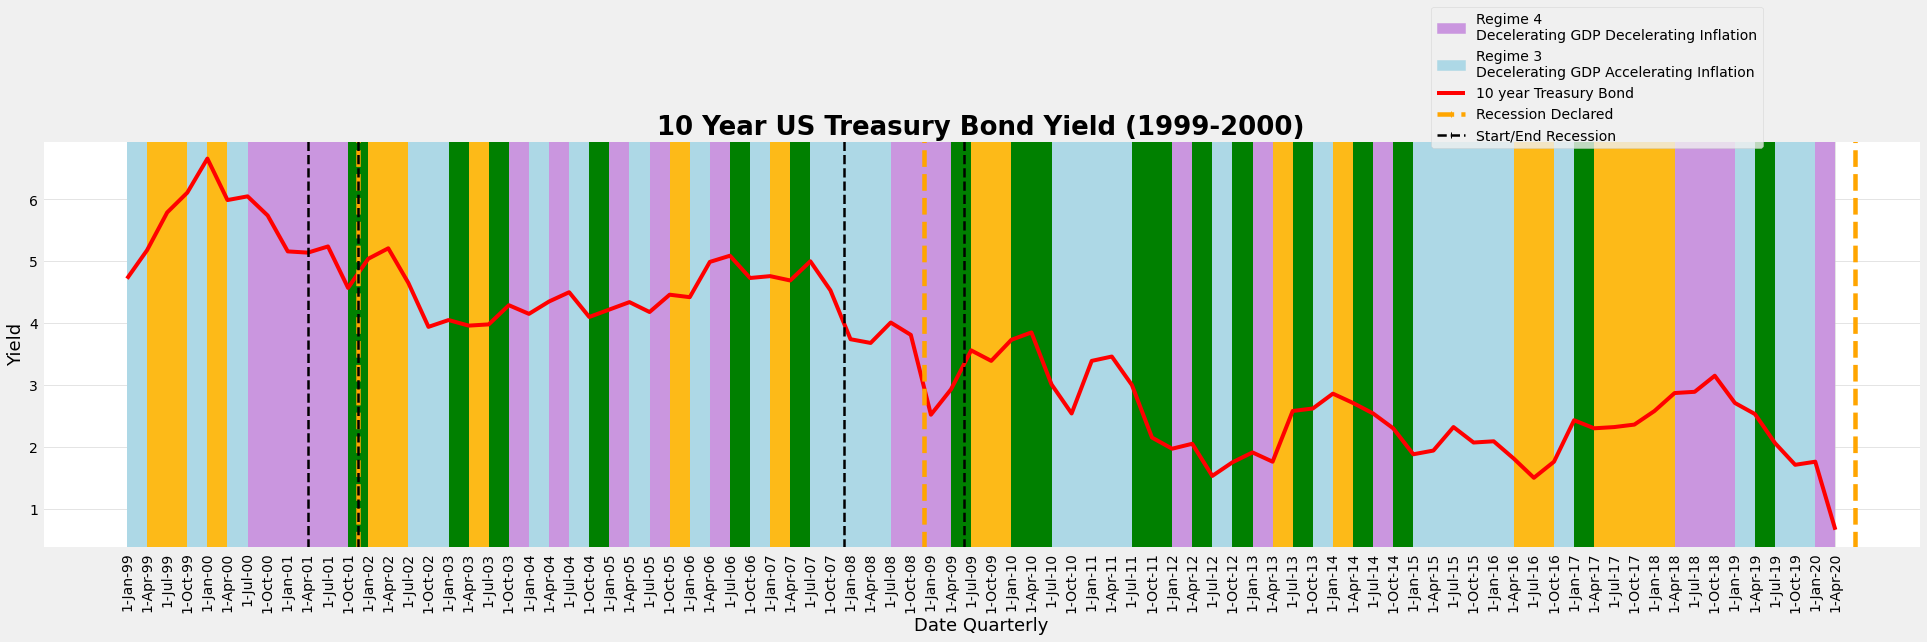

In [ ]:
import matplotlib.patches as mpatches
from matplotlib import lines

# Plotting the 10 year Treasury yield (1999-200)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,7))  # chart 19.5in x 8
ax.set_facecolor('w') # grey background/facecolor

x = np.arange(85) # totals 85 ticks on x-axis
ax.set_xticklabels(t10_qoq['date'], rotation='vertical')  # x-axis tick labels , rotate to vertical

plt.xticks(x, t10_qoq['date'])  # plotting the df['date'] 

# 10_year_Bond_qoq
ax.plot(t10_qoq['date'], t10_qoq['yr_10'], color='red', linewidth=4)
x = np.arange(86)
ax.set_xticklabels(t10_qoq['date'], rotation='vertical')

plt.xticks(x, t10_qoq['date'])  # plotting the df['date'] column

# Color coordinated bar plot

# Regime1
plt.axvspan(11, 12, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(16, 17, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(18, 19, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(23, 24, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(30, 31, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(33, 34, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(41, 42, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(44, 46, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(50, 52, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(53, 54, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(55, 56, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(58, 59, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(61, 62, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(63, 64, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(72, 73, facecolor='Green')  #vertical shading #9E9E9E(grey)
plt.axvspan(81, 82, facecolor='Green')  #vertical shading #9E9E9E(grey)


# END REGIME 1

# Regime2
plt.axvspan(1, 3, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(4, 5, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(12, 14, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(17, 18, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(27, 28, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(32, 33, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(42, 44, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(57, 58, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(60, 61, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(69, 71, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(73, 77, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
plt.axvspan(82, 83, facecolor='#FDBA18')  #vertical shading #9E9E9E(grey)
# END REGIME2

#REGIME3

plt.axvspan(0, 1, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(3, 4, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(5, 6, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(14, 16, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(20, 21, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(22, 23, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(25, 26, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(28, 29, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(31, 32, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(34, 38, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(46, 50, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(54, 55, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(59, 60, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(64, 69, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(71, 72, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(80, 81, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(82, 83, facecolor='lightblue')  #vertical shading #9E9E9E(grey)
plt.axvspan(83, 84, facecolor='lightblue')  #vertical shading #9E9E9E(grey)

#END REGIME3

#  Shades vertically during Regime4 'dates' (down GDP, Down CPI)  
plt.axvspan(6, 11, facecolor='#CA96DF') 
plt.axvspan(19, 20, facecolor='#CA96DF')  
plt.axvspan(21, 22, facecolor='#CA96DF')  
plt.axvspan(24, 25, facecolor='#CA96DF')  
plt.axvspan(26, 27, facecolor='#CA96DF')  
plt.axvspan(29, 30, facecolor='#CA96DF')  
plt.axvspan(38, 41, facecolor='#CA96DF')  
plt.axvspan(52, 53, facecolor='#CA96DF')  
plt.axvspan(56, 57, facecolor='#CA96DF')    
plt.axvspan(62, 63, facecolor='#CA96DF')  
plt.axvspan(77, 79, facecolor='#CA96DF') 
plt.axvspan(79, 80, facecolor='#CA96DF')
plt.axvspan(84, 85, facecolor='#CA96DF')
#  END of REGIME4

#2001 financial crash (begin, declared, end)

ax.axvline(9, color='black', linestyle='--', linewidth=2.5)
ax.axvline(11.5, color='orange', linestyle='--', linewidth=4.5)
ax.axvline(11.5, color='black', linestyle='--', linewidth=2.5)

#2008 financial crash (begin, declared, end)

ax.axvline(35.66, color='black', linestyle='--', linewidth=2.5)
ax.axvline(39.66, color='orange', linestyle='--', linewidth=4.5)
ax.axvline(41.66, color='black', linestyle='--', linewidth=2.5)

# 2020 recession (june 9, 2020 - declared)

ax.axvline(86, color='orange', linestyle='--', linewidth=4.5)

plt.xlabel("Date Quarterly", size=18)
plt.ylabel("Yield", size=18)
plt.title("10 Year US Treasury Bond Yield (1999-2000)", size=26, fontweight='bold')

ax.grid(linewidth=.5)
red_line = lines.Line2D([],[], color='red', linestyle='-', linewidth=4, label='10 year Treasury Bond')
vertical_line1 = lines.Line2D([],[], color='orange', marker='|', linestyle='--', linewidth=4.5, label='Recession Declared')
vertical_line2 = lines.Line2D([],[], color='black', marker='|', linestyle='--', linewidth=2.5, label='Start/End Recession')
blue_patch = mpatches.Patch(color='lightblue', label='Regime 3 \nDecelerating GDP Accelerating Inflation')
purple_patch = mpatches.Patch(color='#CA96DF', label='Regime 4 \nDecelerating GDP Decelerating Inflation')

plt.legend(handles=[purple_patch, blue_patch, red_line, vertical_line1, vertical_line2], bbox_to_anchor=(.80, .85),
           bbox_transform=plt.gcf().transFigure)

plt.show()